# **Projet python pour la data science / 2024-2025**

R√©dig√© par:
* ABE Kevin
* DEMGNE Lisa
* Oscar

## **Introduction**

Un accident de la route ou accident de la circulation est entendu comme une collision non voulue, non pr√©vue et mal anticip√©e d'au moins un engin roulant avec une chose, un animal ou une personne sur une voie publique ou priv√©e ouverte √† la circulation.Ils constituent un v√©ritable fl√©au mondial, causant chaque ann√©e des milliers de morts et de bless√©s. Ces trag√©dies bouleversent des vies et ont un impact consid√©rable sur la soci√©t√©. En France, la lutte contre ce ph√©nom√®ne est prise en charge au niveau national par la d√©l√©gation √† la s√©curit√© routi√®re, qui se sert des √©clairages fourni par un document d'information √©dit√© annuellement par l'ONISR (Observatoire National Interminist√©riel de la S√©curit√© Routi√®re) faisant la synth√®se des principales donn√©es de l'accidentologie.

Nous nous int√©resserons dans le cadre de ce projet √† la description de l'accidentologie en France en 2023, ainsi qu'a la pr√©diction du niveau de gravit√© d'un accident. Ainsi, ce projet se donne de renseigner sur la fr√©quence des accidents, le profil des victimes, les caract√©ristiques des v√©hicules impliqu√©s, les conditions m√©t√©orologiques,... et ainsi que les facteurs succeptibles d'influencer le niveau de gravit√© d'un accident.

In [2]:
!pip install requests
!pip install os
!pip install matplotlib
!pip install pandas 
!pip install plotly
!pip install plotly
!pip install io
!pip install seaborn
!pip install ipywidgets
!pip install tabulate
!pip install ipywidgets 
!pip install tabulate 
!pip install scipy
!pip install numpy 
!pip install IPython

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation 

### *Packages

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import requests
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
import io
import seaborn as sns
import ipywidgets as widgets
from tabulate import tabulate
from scipy.stats import chi2_contingency
import numpy as np
from IPython.display import display


### **I- Importation des bases de donn√©es et preprocessing**

### 1)-Importation des bases de donn√©es

Dans cette partie, nous allons importer les bases donn√©es qui seront utilis√©es dans ce projet.
- base des usagers ayant √©t√© impliqu√© dans un accident de circulation en 2023
- base qui donne la description des v√©hicules impliqu√©s dans les accidents de circulation en 2023
- base des lieux o√π se sont produit les accidents
- base contenant les caract√©ristiques des accidents.




In [3]:
# fonction de t√©l√©chargement des donn√©es sur les accidents corporels
def telecharge(url_data,filename, path):
    # V√©rifie si le dossier 'data' existe, sinon le cr√©e
    if not os.path.exists(path):
        os.makedirs(path)
    #t√©l√©charge les donn√©es avec l'url
    response = requests.get(url_data)
    if response.status_code == 200:
        file_path = os.path.join(path, filename)
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Fichier {filename} t√©l√©charg√© avec succ√®s:{file_path}")
    else:
        print(f"Echec de t√©l√©chargement pour {filename}. Statut: {response.status_code}")

# API pour acc√©der √† l'url de t√©l√©chargement
url_root="https://www.data.gouv.fr/api/1/datasets/53698f4ca3a729239d2036df/resources/"
urls={
    "usagers-2023.csv":"68848e2a-28dd-4efc-9d5f-d512f7dbe66f",
    "vehicules-2023.csv":"146a42f5-19f0-4b3e-a887-5cd8fbef057b",
    "lieux-2023.csv":"8bef19bf-a5e4-46b3-b5f9-a145da4686bc",
    "caract-2023.csv":"104dbb32-704f-4e99-a71e-43563cb604f2"
}
path='data'

for filename, resource_id in urls.items():
    url=url_root+resource_id
    response1=requests.get(url)
    if response1.status_code==200:
        data=response1.json()
        url_data=data['url']
    else:
        print("downloading failed")
    telecharge(url_data,filename,path)


Fichier usagers-2023.csv t√©l√©charg√© avec succ√®s:data/usagers-2023.csv
Fichier vehicules-2023.csv t√©l√©charg√© avec succ√®s:data/vehicules-2023.csv
Fichier lieux-2023.csv t√©l√©charg√© avec succ√®s:data/lieux-2023.csv
Fichier caract-2023.csv t√©l√©charg√© avec succ√®s:data/caract-2023.csv


In [ ]:
# t√©l√©chargement de la liste des d√©partements
url_code_dep=f"https://tabular-api.data.gouv.fr/api/resources/e436f772-b05d-47f8-b246-265faab8679f/data/?page=1"
response=requests.get(url_code_dep)
data=response.json()
df_code_dep = pd.DataFrame(data["data"])
df_dep=df_code_dep
for i in range(2,7):
    url_code_dep=f"https://tabular-api.data.gouv.fr/api/resources/e436f772-b05d-47f8-b246-265faab8679f/data/?page={i}"
    response=requests.get(url_code_dep)
    if response.status_code==200:
        data=response.json()
        df_code_dep1 = pd.DataFrame(data["data"])
    else:
        print("downloading failed")
    df_dep=pd.concat([df_dep, df_code_dep1], axis=0)


In [4]:
# base des usagers 
df_usagers = pd.read_csv("data/usagers-2023.csv", sep = ';')
df_usagers.head()

Num_Acc    id_usager  id_vehicule num_veh  place  catu  grav  sexe  \
0  202300000001  203¬†851¬†184  155¬†680¬†557     A01      1     1     4     1   
1  202300000002  203¬†851¬†182  155¬†680¬†556     A01      1     1     1     2   
2  202300000002  203¬†851¬†183  155¬†680¬†556     A01     10     3     3     1   
3  202300000003  203¬†851¬†180  155¬†680¬†554     B01      1     1     3     1   
4  202300000003  203¬†851¬†181  155¬†680¬†555     A01      1     1     1     2   

   an_nais  trajet  secu1  secu2  secu3  locp actp  etatp  
0   1978.0       5      2      0     -1    -1   -1     -1  
1   1997.0       9      1      0     -1    -1   -1     -1  
2   1997.0       9      0     -1     -1     2    3      1  
3   1987.0       0      2      6      0     0    0     -1  
4   1984.0       0      1      0      0     0    0     -1

In [50]:
# Base des v√©hicules 
df_vehicules = pd.read_csv("data/vehicules-2023.csv", sep = ';')
df_vehicules.head()  

Num_Acc  id_vehicule num_veh  senc  catv  obs  obsm  choc  manv  \
0  202300000001  155¬†680¬†557     A01     1    30    0     0     5     1   
1  202300000002  155¬†680¬†556     A01     2     7    0     1     1     1   
2  202300000003  155¬†680¬†554     B01     1     2    0     2     1    16   
3  202300000003  155¬†680¬†555     A01     2     7    0     2     2    15   
4  202300000004  155¬†680¬†551     B01     1     7    0     2     9     2   

   motor  occutc  
0      1     NaN  
1      1     NaN  
2      1     NaN  
3      1     NaN  
4      4     NaN

In [6]:
# Base des lieux 
df_lieux = pd.read_csv("data/lieux-2023.csv", sep = ';')
df_lieux.head(5)

/tmp/ipykernel_4741/483356611.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux = pd.read_csv("data/lieux-2023.csv", sep = ';')


Num_Acc  catr                 voie  v1   v2  circ nbv  vosp  prof  \
0  202300000001     4        RUE DE RIVOLI   0  NaN     1   2     0     1   
1  202300000001     4  RUE SAINT FLORENTIN   0  NaN     1   1     0     1   
2  202300000002     3                  120   0  NaN     2   3     2     1   
3  202300000003     3                    5   0  NaN     2   4     0     1   
4  202300000003     3                   87   0  NaN     2   4     0     1   

    pr  pr1  plan lartpc larrout  surf  infra  situ  vma  
0   -1   -1     1    NaN      -1     2      0     1   30  
1   -1   -1     1    NaN      -1     2      0     1   30  
2   -1   -1     1    NaN      -1     2      0     1   50  
3    1    0     1    NaN      -1     2      5     1   50  
4    1    0     1    NaN      -1     2      5     1   50

In [7]:
# Base caract
df_caract = pd.read_csv("data/caract-2023.csv", sep = ';')
df_caract.head()

Num_Acc  jour  mois    an   hrmn  lum dep    com  agg  int  atm  col  \
0  202300000001     7     5  2023  06:00    1  75  75101    2    4    2    7   
1  202300000002     7     5  2023  05:30    5  94  94080    2    1    3    6   
2  202300000003     7     5  2023  20:50    1  94  94022    2    3    2    1   
3  202300000004     6     5  2023  23:57    5  94  94078    2    1    3    5   
4  202300000005     7     5  2023  00:50    5  94  94068    2    2    3    3   

                         adr          lat        long  
0              RUE DE RIVOLI  48,86638600  2,32347100  
1            Avenue de Paris  48,84547782  2,42868146  
2  Avenue du G√©n√©ral Leclerc  48,76240000  2,40655000  
3               Rue de Paris  48,73248432  2,44687575  
4       56bis Avenue Raspail  48,78581000  2,49217000

Nous construisons et nettoyons √† pr√©sent la base de donn√©es qui r√©sultera de la fusion des toutes les bases import√©es pr√©cedemment. Cette base de donn√©es sera utilis√©e pour la mod√©lisation.

Dans un premier temps, nous fusionons la base des usagers et celle des v√©hicules sur les variables "Num_acc" (Num√©ro de l'accident), "id_vehicule" (identifiant du v√©hicule) et "num_veh" (num√©ro du v√©hicule) qui sont commun aux deux bases. Ensuite, nous fusionons les autres bases sur la variable "Num_acc". Nous utilisons l'option "inner" qui utilise l'intersection des cl√©s dans les deux tables.

In [8]:
# fusion des bases de donn√©es
df_merge = df_usagers.merge(df_vehicules, on=["Num_Acc","id_vehicule","num_veh"], how="inner") 
df_merge = df_merge.merge(df_lieux, on="Num_Acc", how="inner")
df_merge = df_merge.merge(df_caract, on="Num_Acc", how="inner")

### 2)- Preprocessing

Nous allons par la suite visualiser le pourcentage de valeurs manquantes de la base:

In [10]:
df_merge.isna().sum()[df_merge.isna().sum()!=0]/len(df_merge)*100

an_nais     2.145611
occutc     98.334586
voie       17.348167
v2         91.677205
lartpc     99.952347
adr         2.474906
dtype: float64

Nous supprimons les variables qui ont plus de 90% de valeurs manquantes car elles n'apportent pas vraiment d'informations.

In [ ]:
df_merge.drop(["occutc","lartpc","v2"], axis=1, inplace=True)
df_lieux.drop(["lartpc","v2"], axis=1, inplace=True)
df_vehicules.drop(["occutc"], axis=1, inplace=True)

Nous commen√ßons par supprimer les variables d'identification.

In [13]:
var=["Num_Acc","jour","an","com","adr","lat","long","voie","v1","id_vehicule","num_veh","id_usager", "dep"]
Num_acc=df_merge["Num_Acc"]
df_merge.drop(var, axis=1,inplace=True)
# supprimer aussi dans les autres bases????

Ensuite, nous d√©duisons de la variable "an_nais" (ann√©e de naissance), l'√¢ge des individus. 

<Axes: xlabel='Age'>

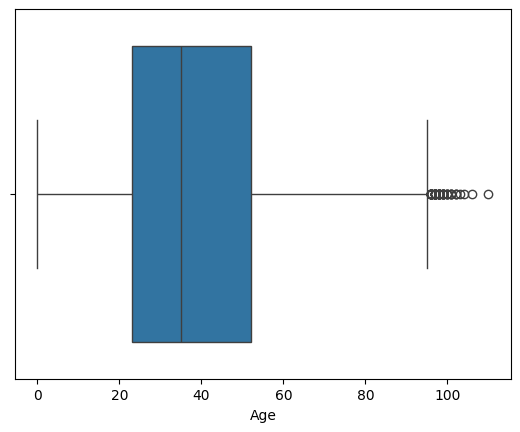

In [14]:
df_merge["Age"] = 2023-df_merge["an_nais"]
sns.boxplot(data=df_merge, x=df_merge['Age'])

Nous allons imputer les valeurs manquantes de l'√¢ge par la m√©diane car elle est moins sensible aux valeurs abb√©rantes.

In [ ]:
df_merge["Age"]=df_merge["Age"].fillna(df_merge["Age"].median())
df_usagers["Age"] = 2023-df_usagers["an_nais"]
df_usagers["Age"]=df_usagers["Age"].fillna(df_usagers["Age"].median())



In [ ]:
###### Faire ceci et le code suivant apr√®s la partie des croisements

#recodage des variables trajet et actp de la base usager
df_merge["trajet"]=df_merge["trajet"].replace(0, value=-1)
df_merge["actp"]=df_merge["actp"].replace(0, value=-1)

# variables de type object de la base
df_merge.select_dtypes("object").columns

In [ ]:
# conversion des variables de type object en variables num√©riques
def replace_pr(val):
    if len(val.split())==1:
        val=val
    else:
        if len(val.split())>1:
            val=val.split()[1]
        else:
            val="-1"
    return val
df_merge["pr"]=df_merge["pr"].apply(func=replace_pr)
df_merge["pr"]=df_merge["pr"].astype(float)
df_merge["pr1"]=df_merge["pr1"].apply(func=replace_pr)
df_merge["pr1"]=df_merge["pr1"].astype(float)
def rep_virgule(val):
    val=val.replace(",",".")
    return val
df_merge["larrout"]=df_merge["larrout"].apply(rep_virgule)
df_merge["larrout"]=df_merge["larrout"].astype(float)
def heure(val):
    val=val.split(":")[0]
    return val
df_merge["hrmn"]=df_merge["hrmn"].apply(func=heure)
df_merge["hrmn"]=df_merge["hrmn"].astype(float)

df_merge["nbv"]=df_merge["nbv"].str.strip()
df_merge["nbv"]=df_merge["nbv"].replace("#VALEURMULTI","-1")
df_merge["nbv"]=df_merge["nbv"].astype(float)

df_merge["actp"]=df_merge["actp"].replace(["A","B"],["10","11"])
df_merge["actp"]=df_merge["actp"].astype(float)

## **II- Analyses descriptives**

Dans cette partie, nous ferrons essentiellement de l'analyse descriptive univari√©e et bivari√©e. De mani√®re plus pr√©cise, il s'agira de visualiser la distribution des variables des diff√©rentes bases individuellement ou en croisant avec d'autres variables.

### 1- Description de la base usagers

Selon le "Guide BAAC 2017" un usager est une personne physique impliqu√©e dans un accident de la circulation en tant que conducteur/passager d'un v√©hicule ou pi√©ton.

In [17]:
#Mapping 
sexe_labels = {1: 'Masculin', 2: 'F√©minin', -1: 'Autres'}
catu_labels = {1: 'Conducteur', 2: 'Passager', 3: 'Pi√©ton'}
grav_labels = {1: 'Indemne', 2: 'Tu√©', 3: 'Bless√© hospitalis√© > 24h', 4: 'Bless√© l√©ger',-1: 'Non renseign√©'}
secu1_labels = {
    -1: "Non renseign√©",
    0: "Aucun √©quipement",
    1: "Ceinture",
    2: "Casque",
    3: "Dispositif enfants",
    4: "Gilet r√©fl√©chissant",
    5: "Airbag (2RM/3RM)",
    6: "Gants (2RM/3RM)",
    7: "Gants + Airbag (2RM/3RM)",
    8: "Non d√©terminable",
    9: "Autre"
}

secu2_labels = {
    -1: "Non renseign√©",
    0: "Aucun √©quipement",
    1: "Ceinture",
    2: "Casque",
    3: "Dispositif enfants",
    4: "Gilet r√©fl√©chissant",
    5: "Airbag (2RM/3RM)",
    6: "Gants (2RM/3RM)",
    7: "Gants + Airbag (2RM/3RM)",
    8: "Non d√©terminable",
    9: "Autre"
}

secu3_labels = {-1: "Non renseign√©",0: "Aucun √©quipement",1: "Ceinture",2: "Casque",3: "Dispositif enfants",4: "Gilet r√©fl√©chissant",
    5: "Airbag (2RM/3RM)",
    6: "Gants (2RM/3RM)",
    7: "Gants + Airbag (2RM/3RM)",
    8: "Non d√©terminable",
    9: "Autre"}
locp_labels = {
    -1: 'Non renseign√©',
    0: 'Sans objet',
    1: 'A + de 50 m du passage pi√©ton',
    2: 'A - de 50 m du passage pi√©ton',
    3: 'Sans signalisation lumineuse',
    4: 'Avec signalisation lumineuse',
    5: 'Trottoir',
    6: 'Sur accotement',
    7: 'Sur refuge ou BAU',
    8: 'Sur contre-all√©e',
    9: 'Inconnue'
}                                                                                                                                  
actp_labels = {
    ' -1': 'Non renseign√©',
    '0': 'Sans objet',
    '1': 'Sens du v√©hicule heurtant',
    '2': 'Sens inverse du v√©hicule heurtant',
    '3': 'Traversant',
    '4': 'Masqu√©',
    '5': 'Jouant-courant',
    '6': 'Avec animal',
    '7': 'Quitte l arr√™t du TC',
    '8': 'Acc√®de √† l arr√™t du TC',
    '9': 'Autre',
    'A': 'Monte ou descend de son v√©hicule', 
    'B': 'Inconnu'  
}

etatp_labels = {
    -1:'Non renseign√©',
    0: 'Sans objet',
    1: 'Seul',
    2: 'Accompag√©',
    3: 'En groupe'
}
trajet_labels = {
    -1:'Non renseign√©',
    0: 'Non renseign√©',
    1: 'Domicile-travail',
    2: 'Domicile-√©cole',
    3: 'Courses-achats',
    4: 'Utilisation professionnelle',
    5: 'Promenade-loisirs',
    9: 'Autre'
}


In [20]:
missing_percentage = (df_usagers.isnull().sum() / len(df_usagers)) * 100
print("Pourcentage de valeurs manquantes par variable :")
print(missing_percentage)

Pourcentage de valeurs manquantes par variable :
Num_Acc        0.000000
id_usager      0.000000
id_vehicule    0.000000
num_veh        0.000000
place          0.000000
catu           0.000000
grav           0.000000
sexe           0.000000
an_nais        2.065363
trajet         0.000000
secu1          0.000000
secu2          0.000000
secu3          0.000000
locp           0.000000
actp           0.000000
etatp          0.000000
Age            0.000000
dtype: float64


In [21]:
def mapping_apply(data,mapping_dict):
    for column, mapping in mapping_dict.items():
        if column in data.columns: 
            data[column] = data[column].map(mapping)

In [22]:
mapping_dict1 = {
    "sexe": sexe_labels,
    "catu": catu_labels,
    "grav": grav_labels,
    "trajet": trajet_labels,
    "secu1": secu1_labels,
    "secu2": secu2_labels,
    "secu3": secu3_labels,
    "locp": locp_labels,
    "actp": actp_labels,
    "etatp": etatp_labels}
mapping_apply(df_usagers,mapping_dict1)

In [ ]:
def plot_all_distributions1(df, columns):
    """
    Repr√©sente les distributions des variables cat√©gorielles dans un seul cadran avec des sous-graphiques.
    
    Param√®tres:
    df : DataFrame pandas contenant les donn√©es
    columns : Liste des colonnes cat√©gorielles √† repr√©senter
    """
    # Dictionnaire pour mapper les variables aux titres
    column_titles = {
        "catu":"Categorie_vehicule",
        "grav":"Gravite de blessure de l usager",
        "trajet":"Motif du deplacement au moment de l accident",
        "secu1":"Equipement de securite 1",
        "secu2":"Equipement de securite 2",
        "secu3":"Equipement de securite 3",
        "locp":"Localisation du pieton",
        "actp":"Action du pieton",
        "etatp":"Etat du pieton",
        "senc": "Sens de circulation",
        "obs": "Obstacles fixes heurt√©s",
        "obsm": "Obstacle mobile heurt√©",
        "choc": "Point de choc initial",
        "manv": "Man≈ìuvre principale avant accident",
        "motor": "Type de motorisation du v√©hicule"
    }
    
    # D√©finir le nombre de lignes et de colonnes pour les subplots
    n_cols = 2  # Nombre de colonnes par ligne pour agrandir les graphiques
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Nombre total de lignes (arrondi vers le haut)
    
    # Initialiser la figure avec une taille plus grande
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un acc√®s facile
    
    # Parcourir les colonnes pour cr√©er chaque graphique
    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
        title = column_titles.get(column, column)  # R√©cup√©rer le titre ou le nom de la colonne par d√©faut
        axes[i].set_title(f"Distribution de '{title}'", fontsize=14)
        axes[i].set_xlabel(title, fontsize=12)
        axes[i].set_ylabel("Fr√©quence", fontsize=12)
        axes[i].tick_params(axis='x', rotation=60)
        
        # Ajouter les valeurs au-dessus des barres
        for p in axes[i].patches:
            axes[i].annotate(f'{int(p.get_height())}',
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             fontsize=10, color='black',
                             xytext=(0, 5), textcoords='offset points')
        
    # Supprimer les axes vides si le nombre de graphiques est inf√©rieur aux subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

In [24]:
columns1 =["catu","grav","trajet","sexe"]
columns2 =["secu1","secu2","secu3"]
columns3 =["locp","actp","etatp"]

/tmp/ipykernel_4741/222538112.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
/tmp/ipykernel_4741/222538112.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
/tmp/ipykernel_4741/222538112.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
/tmp/ipykernel_4741/222538112.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

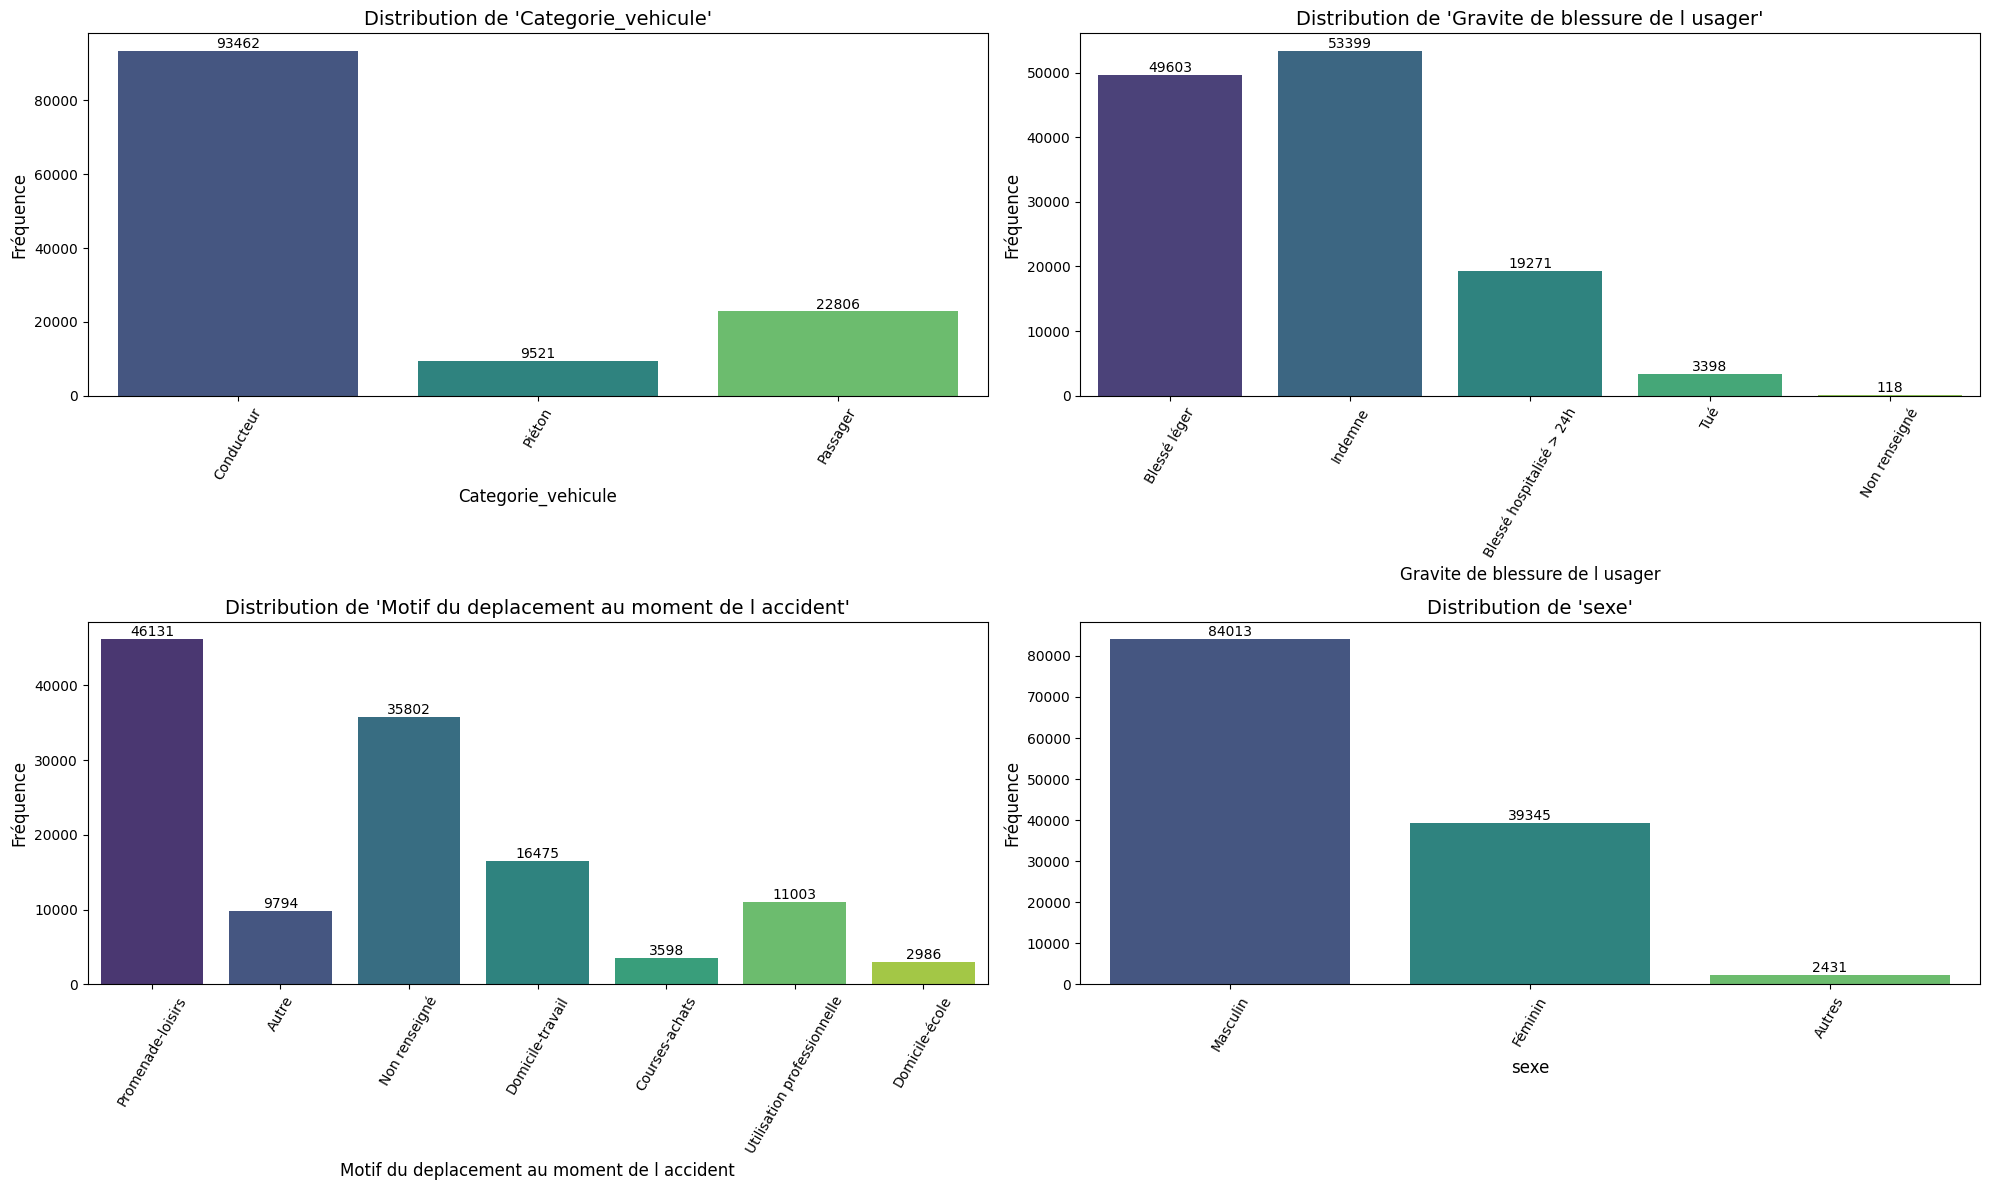

In [25]:
plot_all_distributions1(df_usagers, columns1)

#### Cat√©gorie d'usagers (catu) : Identification des cat√©gories les plus expos√©es (conducteurs, passagers, pi√©tons).
On observe que la majorit√© des personnes impliqu√©es dans des accidents sont des conducteurs(soit 93462 usagers), ensuite vient les passagers (22806 usagers) et enfin les pi√©tons (9521 usagers).

#### R√©partition selon la gravit√© (grav) : Observation de la distribution des niveaux de gravit√© des accidents.
Les r√©sultats montrent que la majorit√© des usagers impliqu√©s dans les accidents (53339) sont indemnes, ce qui indique que les accidents sont souvent de faible gravit√©. Aussi, un nombre importante (49603) ont entrain√© des blessures l√©g√®res. 
Il en ressort √©galement un r√©sultats alarmant selon lequel 19271 des cas d'accidents ont entrain√© des blessures graves et n√©cessitent
une hospitalisation de plus de 24 heures et 3398 accidents ont entrain√© la mort des usagers

#### Analyse des trajets
Les statistiques montrent que les promenades-loisirs dominent les motifs de d√©placement des usagers impliqu√©s dans des accidents avec une fr√©quence de 46131, suivies des trajets non renseign√©s (33303).
Les trajets domicile-travail (16475) et utilisation professionnelle (11003) r√©v√®lent l'importance des d√©placements li√©s √† l'activit√© professionnelle, totalisant une fr√©quence de 27478, et pointent des enjeux sp√©cifiques comme les risques associ√©s aux heures de pointe, au stress, et √† la fatigue. Les trajets domicile-√©cole (2986) et les d√©placements pour courses-achats (3598) sont les moins employ√©s.

#### Sexe
La majorit√© des usagers impliqu√©s dans les accidents sont de sexe masculin, repr√©sentant 66,8% du total. Cela sugg√®re que, dans cette population, les hommes sont nettement plus nombreux que les femmes √† √™tre impliqu√©s dans des accidents.Les femmes repr√©sentent 31,3% des usagers impliqu√©s et la cat√©gorie "autres" repr√©sente 1,9% des cas, ce qui pourrait inclure des personnes dont le sexe n'est pas pr√©cis√© ou qui ne s'identifient pas selon les cat√©gories traditionnelles de sexe. Cette proportion est relativement faible, mais elle m√©rite d'√™tre mentionn√©e.

/tmp/ipykernel_4741/222538112.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
/tmp/ipykernel_4741/222538112.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
/tmp/ipykernel_4741/222538112.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])


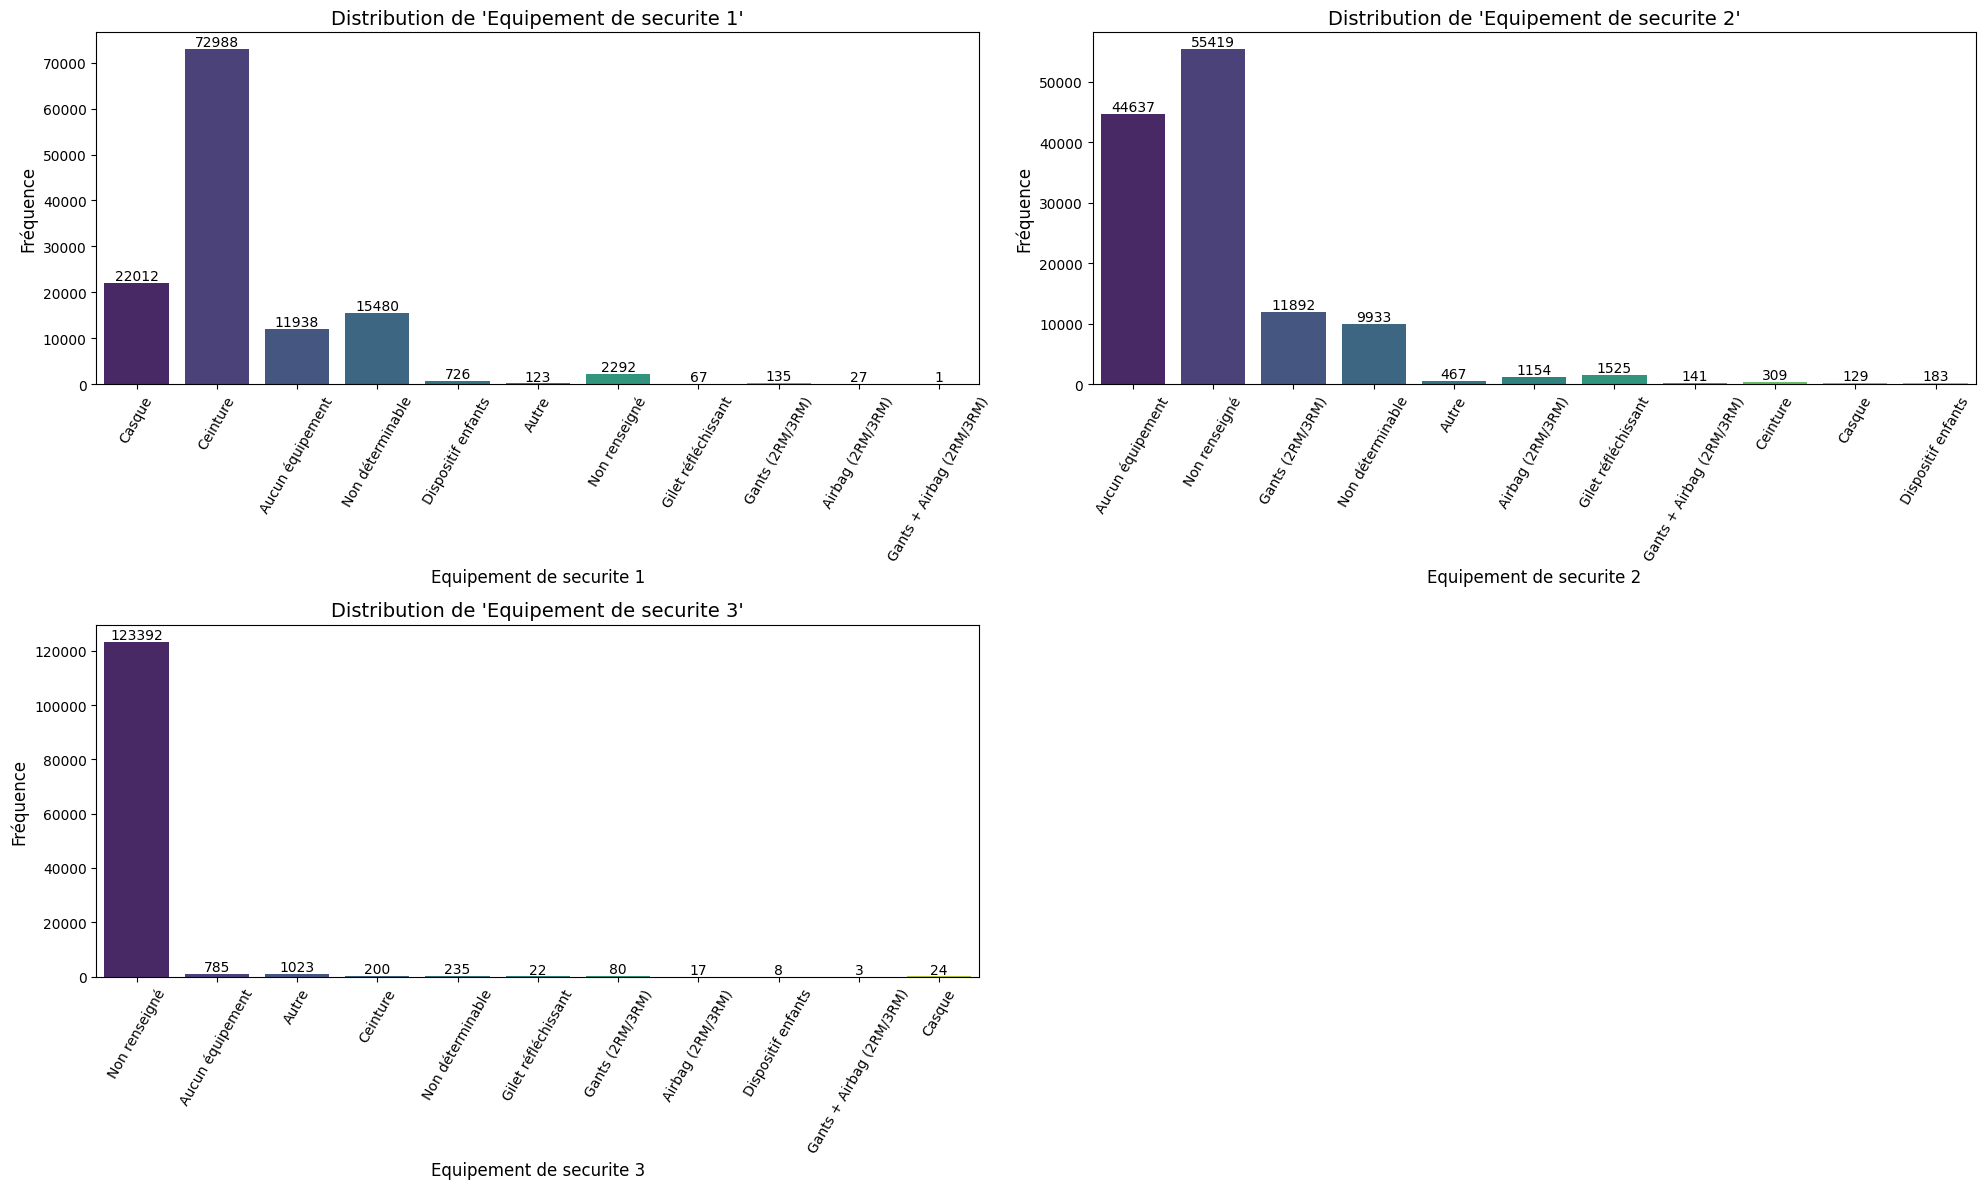

In [26]:
plot_all_distributions1(df_usagers, columns2)

#### R√©partition des dispositifs de s√©curit√© (Secu1 et Secu2)

En examinant la r√©partition des dispositifs de s√©curit√© secu1, on constate que la ceinture 
de s√©curit√© est l'√©quipement le plus fr√©quemment utilis√©, avec 72988 des usagers tandis que les dispositifs pour enfants repr√©sentent 
une part marginale, √† 726 utilisations.

Pour secu2, une majorit√© (44637 utilisations) des usagers impliqu√©s dans les accidents ne portaient aucun √©quipement. Parmi ceux qui portaient des √©quipements, les gants (2/3 RM) sont les plus courants (11892 utilisations), suivis des gilets r√©fl√©chissants (1525) et des airbags personnels (2/3 RM) (1154). Les autres √©quipements et les combinaisons airbag personnel + gants (2/3 RM) sont les moins utilis√©s (467 et 141 utilisations respectivement).

secu3 ne sera pas analys√© car pratiquement toutes les observations sont non renseign√©es.

R√©partition par sexe : Proportion d'hommes et de femmes impliqu√©s dans les accidents.
Selon "Guide BAAC 2017" 1 = Masculin, 2 = Feminin

/tmp/ipykernel_4741/222538112.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
/tmp/ipykernel_4741/222538112.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])
/tmp/ipykernel_4741/222538112.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i])


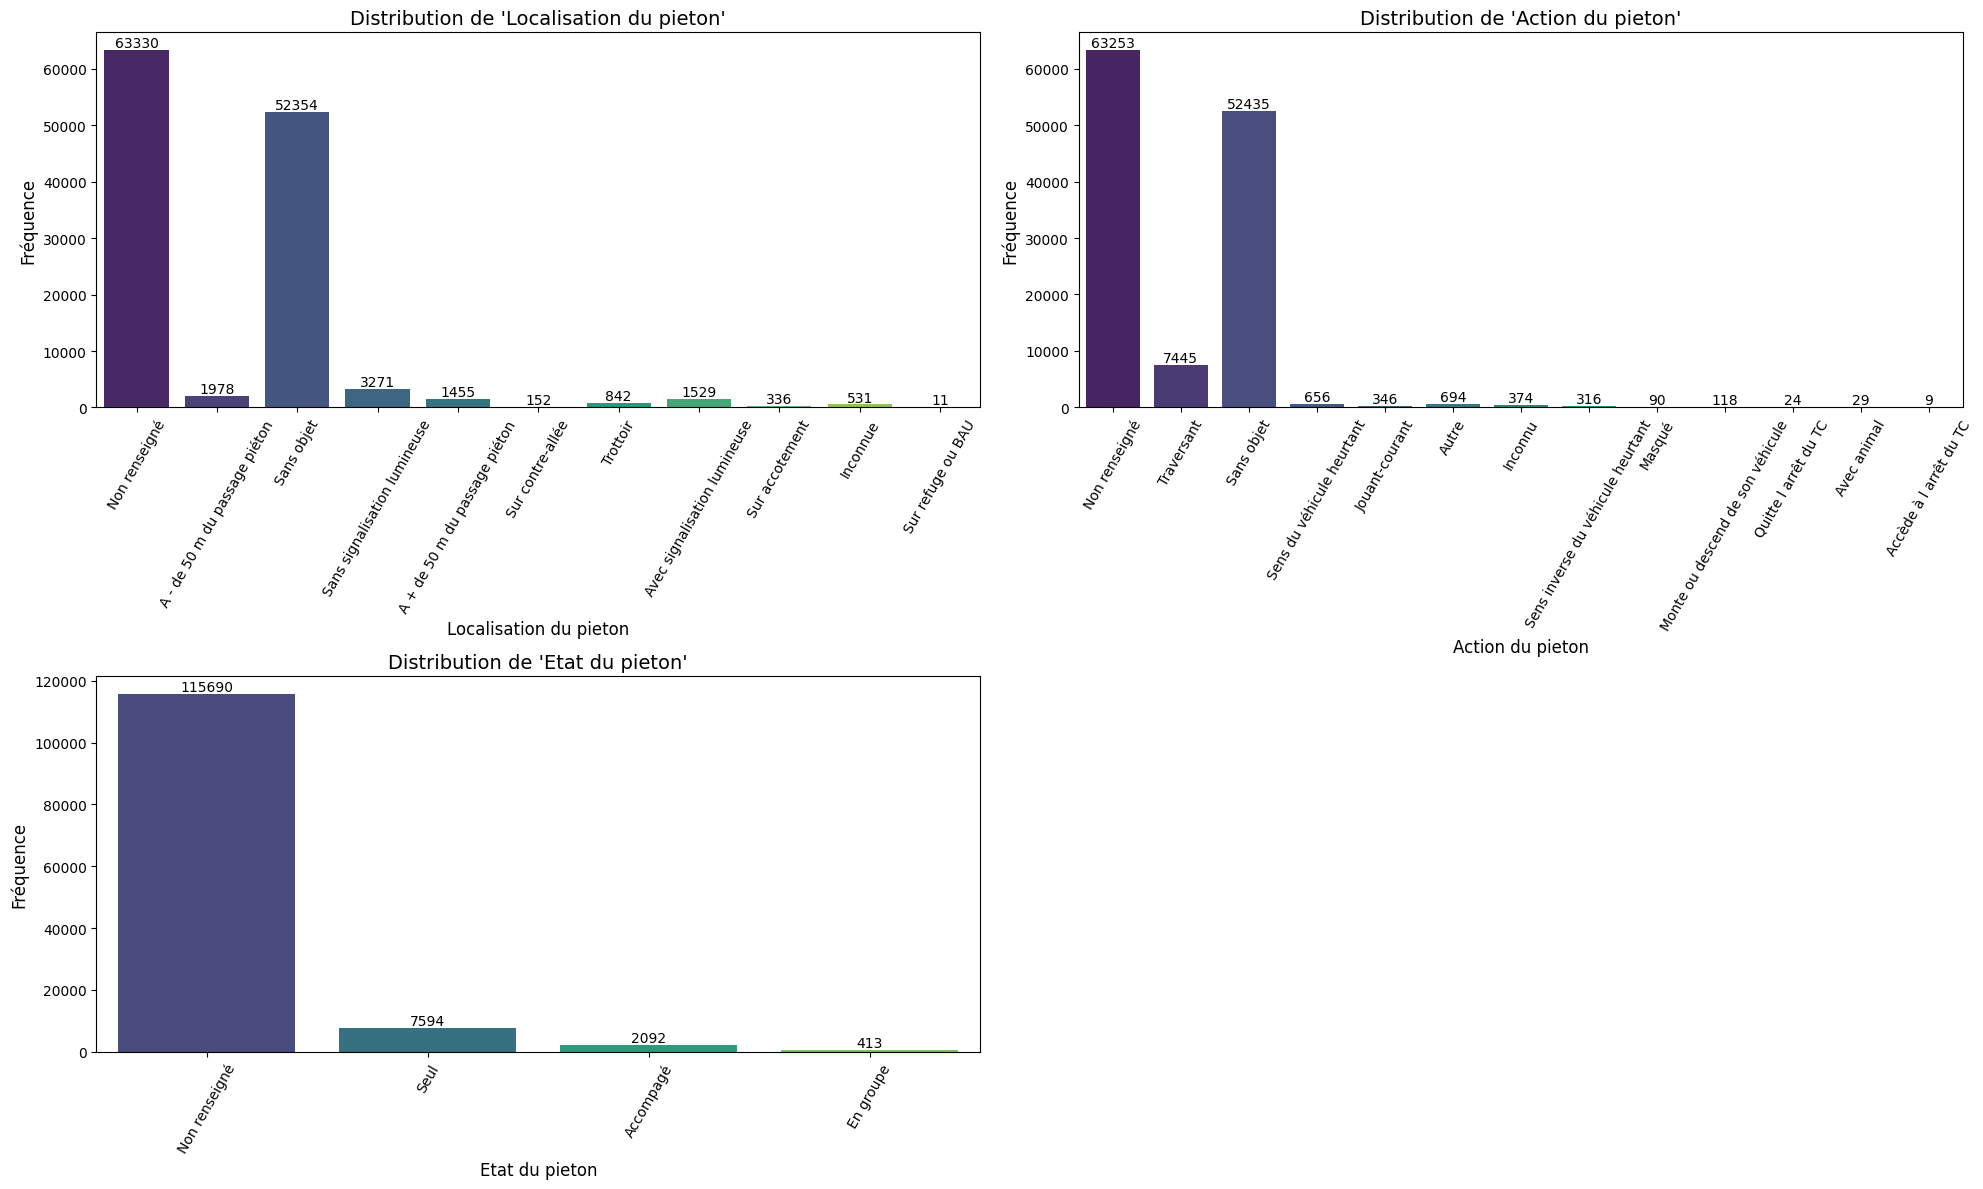

In [27]:
plot_all_distributions1(df_usagers, columns3)

#### Localisation du pi√©ton (locp_label) :
La majorit√© des pi√©tons (84,5 %) se trouvent dans des zones sans objet de localisation pr√©cise.Cela pourrait √™tre d√ª au fait que la base n'incorpore pas les corrections des erreurs de saisie. Parmi les autres cat√©gories renseign√©s, la majorit√© des usagers se trouvent dans des lieux sans signalisation lumineuse (5.3%), ensuite vient ceux se trouvant √† moins de 50 m√®tre du passage pi√©ton (3,2%). Un peu plus de 2 % des pi√©tons se trouvent dans des zones √† plus de 50 m√®tres du passage pi√©ton. La localisation pr√©cise de l'accident est inconnue dans moins de 1 % des cas (Inconnu), et seules de rares observations concernent des pi√©tons sur des trottoirs (1,4 %) ou sur des accotements (0,5 %).

#### Action du pi√©ton (actp_label) :
La majorit√© des pi√©tons (Sup√©rieur 80 % des pi√©tons) sont dans une situation o√π l'action est consid√©r√©e comme "sans objet" ou "non renseign√©". Parmi les actions renseign√©es,les actions les plus fr√©quentes sont les pi√©tons traversant (11,9 %) ou des actions consid√©r√©es comme "autres" (1,1 %). Les cas o√π le pi√©ton est heurt√© dans le sens du v√©hicule sont relativement moins fr√©quents (1 %), tout comme les situations o√π il se trouve dans le sens inverse du v√©hicule heurtant (0,5 %). D'autres actions comme "jouant-courant", "avec animal" ou "masqu√©" sont tr√®s peu fr√©quentes, avec des proportions inf√©rieures √† 1 %, et les cas o√π le pi√©ton monte ou descend de son v√©hicule ou acc√®de √† un arr√™t de transport en commun sont rares (moins de 0,2 %). Cela pourrait envisager des mesures de sensibilisation concernant le code de la route. 

#### √âtat du pi√©ton (etatp_label) :
La grande majorit√© des pi√©tons sont seuls lors de l'accident (75,2 %), suivi d'une proportion importante de cas o√π ils sont accompagn√©s (20,7 %). Les cas o√π le pi√©ton est en groupe sont beaucoup moins fr√©quents, repr√©sentant seulement 4,1 % des observations. Cela pourrait √™tre d√ª au fait que ceux qui sont seul sont les plus expos√©s aux accidents. 

Repartition selon l'√¢ge

‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Statistique   ‚îÇ    Valeur ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Nombre        ‚îÇ 123191    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Moyenne       ‚îÇ     38.75 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ √âcart-type    ‚îÇ     19.1  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Min           ‚îÇ      0    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 25%           ‚îÇ     23    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 50% (m√©diane) ‚îÇ     35    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 75%           ‚îÇ     52    ‚îÇ
‚îú‚îÄ

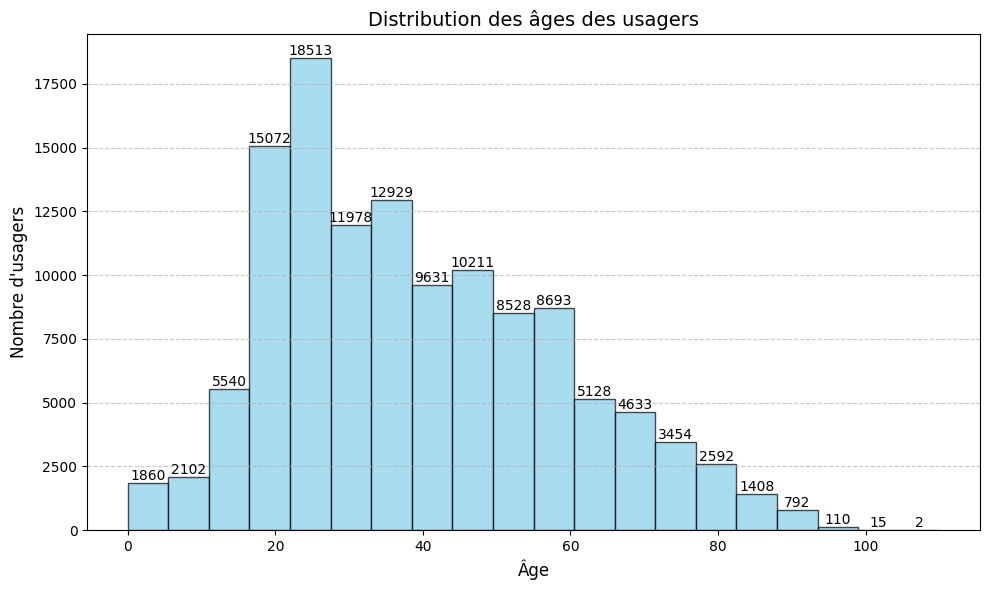

In [36]:
df_usagers['age'] = 2023 - df_usagers['an_nais']
# Calcul des statistiques descriptives
age_stats = df_usagers['age'].describe()

age_summary = pd.DataFrame({'Statistique': ['Nombre', 'Moyenne', '√âcart-type', 'Min', '25%', '50% (m√©diane)', '75%', 'Max'],'Valeur': [int(age_stats['count']),round(age_stats['mean'], 2),round(age_stats['std'], 2),int(age_stats['min']),int(age_stats['25%']),int(age_stats['50%']),int(age_stats['75%']),int(age_stats['max']),]})
print(tabulate(age_summary, headers='keys', tablefmt='fancy_grid', showindex=False))
# Histogramme
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_usagers['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
# Ajouter les chiffres au-dessus de chaque barre
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2,  # Position X au centre de la barre
             patches[i].get_height(),  # Position Y √† la hauteur de la barre
             f'{int(n[i])}',  # Afficher le nombre d'usagers
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution des √¢ges des usagers', fontsize=14)
plt.xlabel('√Çge', fontsize=12)
plt.ylabel('Nombre d\'usagers', fontsize=12)
# Grille et ajustement
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La population analys√©e, compos√©e de 123 191 usagers, pr√©sente un √¢ge moyen de 38,75 ans, avec une dispersion mod√©r√©e (√©cart-type de 19,1 ans) 
et une m√©diane de 35 ans, indiquant que la moiti√© des individus a cet √¢ge ou moins. La majorit√© des usagers se situe entre 23 ans (1er quartile) 
et 52 ans (3e quartile), avec des √¢ges extr√™mes allant de 0 √† 110 ans, bien que ces valeurs puissent inclure des erreurs ou des cas particuliers.
La distribution par tranche d'√¢ge r√©v√®le une forte proportion de jeunes (11,2 % entre 10 et 19 ans) et une concentration probable dans les tranches d'√¢ge actif (20-49 ans),
tandis que les individus tr√®s √¢g√©s (100 ans et plus) restent marginaux (0,01 %). Cette structure refl√®te une population principalement jeune et adulte.

### 2)- Description de la base vehicules

Dictionnaire des variables

In [52]:
#Sens de circulation 
senc_labels = {
    -1: 'Non renseign√©',
    0: 'Inconnu',
    1: 'PK ou PR ou num√©ro d\'adresse postale croissant',
    2: 'PK ou PR ou num√©ro d\'adresse postale d√©croissant',
    3: 'Absence de rep√®re'
}
#obstacles_fixes_heurte
obs_labels = {
    -1: "Non renseign√©",
    0: "Sans objet",
    1: "V√©hicule en stationnement",
    2: "Arbre",
    3: "Glissi√®re m√©tallique",
    4: "Glissi√®re b√©ton",
    5: "Autre glissi√®re",
    6: "B√¢timent, mur, pile de pont",
    7: "Support de signalisation verticale ou poste d‚Äôappel d‚Äôurgence",
    8: "Poteau",
    9: "Mobilier urbain",
    10: "Parapet",
    11: "Ilot, refuge, borne haute",
    12: "Bordure de trottoir",
    13: "Foss√©, talus, paroi rocheuse",
    14: "Autre obstacle fixe sur chauss√©e",
    15: "Autre obstacle fixe sur trottoir ou accotement",
    16: "Sortie de chauss√©e sans obstacle",
    17: "Buse ‚Äì t√™te d‚Äôaqueduc"
}
#Cat√©gorie du v√©hicule
catv_labels = {
    -1:"Non renseign√©",
    0: "Ind√©terminable",
    1: "Bicyclette",
    2: "Cyclomoteur <50cm3",
    3: "Voiturette (Quadricycle √† moteur carross√©) (anciennement 'voiturette ou tricycle √† moteur')",
    4: "R√©f√©rence inutilis√©e depuis 2006 (scooter immatricul√©)",
    5: "R√©f√©rence inutilis√©e depuis 2006 (motocyclette)",
    6: "R√©f√©rence inutilis√©e depuis 2006 (side-car)",
    7: "VL seul",
    8: "R√©f√©rence inutilis√©e depuis 2006 (VL + caravane)",
    9: "R√©f√©rence inutilis√©e depuis 2006 (VL + remorque)",
    10: "VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <= 3,5T)",
    11: "R√©f√©rence inutilis√©e depuis 2006 (VU (10) + caravane)",
    12: "R√©f√©rence inutilis√©e depuis 2006 (VU (10) + remorque)",
    13: "PL seul 3,5T <PTCA <= 7,5T",
    14: "PL seul > 7,5T",
    15: "PL > 3,5T + remorque",
    16: "Tracteur routier seul",
    17: "Tracteur routier + semi-remorque",
    18: "R√©f√©rence inutilis√©e depuis 2006 (transport en commun)",
    19: "R√©f√©rence inutilis√©e depuis 2006 (tramway)",
    20: "Engin sp√©cial",
    21: "Tracteur agricole",
    30: "Scooter < 50 cm3",
    31: "Motocyclette > 50 cm3 et <= 125 cm3",
    32: "Scooter > 50 cm3 et <= 125 cm3",
    33: "Motocyclette > 125 cm3",
    34: "Scooter > 125 cm3",
    35: "Quad l√©ger <= 50 cm3 (Quadricycle √† moteur non carross√©)",
    36: "Quad lourd > 50 cm3 (Quadricycle √† moteur non carross√©)",
    37: "Autobus",
    38: "Autocar",
    39: "Train",
    40: "Tramway",
    41: "3RM <= 50 cm3",
    42: "3RM > 50 cm3 <= 125 cm3",
    43: "3RM > 125 cm3",
    50: "EDP √† moteur",
    60: "EDP sans moteur",
    80: "VAE",
    99: "Autre v√©hicule"
}
#Obstacle mobile heurt√©
obsm_labels = {
    -1: "Non renseign√©",
    0: "Aucun",
    1: "Pi√©ton",
    2: "V√©hicule",
    4: "V√©hicule sur rail",
    5: "Animal domestique",
    6: "Animal sauvage",
    9: "Autre"
}
#point_de_choc_initial
choc_labels = {
    -1: "Non renseign√©",
    0: "Aucun",
    1: "Avant",
    2: "Avant droit",
    3: "Avant gauche",
    4: "Arri√®re",
    5: "Arri√®re droit",
    6: "Arri√®re gauche",
    7: "C√¥t√© droit",
    8: "C√¥t√© gauche",
    9: "Chocs multiples (tonneaux)"
}
#manoeuvre_principale_avant_accident
manv_labels_aggregated = {
    -1: "Non renseign√©",
    0: "Inconnue",
    1: "Sans changement de direction",
    2: "M√™me sens, m√™me file",
    3: "Entre 2 files",
    4: "En marche arri√®re",
    5: "A contresens",
    6: "En franchissant le terre-plein central",
    7: "Dans le couloir bus, dans le m√™me sens",
    8: "Dans le couloir bus, dans le sens inverse",
    9: "En s‚Äôins√©rant",
    10: "En faisant demi-tour sur la chauss√©e",
    11: "Changeant de file",
    12: "Changeant de file",
    13: "D√©port√©",
    14: "D√©port√©",
    15: "Tournant",
    16: "Tournant",
    17: "D√©passant",
    18: "D√©passant",
    19: "Divers",
    20: "Divers",
    21: "Divers",
    22: "Divers",
    23: "Divers",
    24: "Divers",
    25: "Divers",
    26: "Divers"
}

#type_motorisation_vehicule
motor_labels = {
    -1: "Non renseign√©",
    0: "Inconnue",
    1: "Hydrocarbures",
    2: "Hybride √©lectrique",
    3: "Electrique",
    4: "Hydrog√®ne",
    5: "Humaine",
    6: "Autre"
}

In [53]:
mapping_dict2 = {
    "senc": senc_labels,
    "catv": catv_labels,
    "obs": obs_labels,
    "choc": choc_labels,
    "obsm": obsm_labels,
    "manv": manv_labels,
    "motor": motor_labels,
}
mapping_apply(df_vehicules,mapping_dict2)

In [62]:
columns4 = ["senc", "obsm","choc", "motor"]

/tmp/ipykernel_4741/222538112.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_4741/222538112.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_4741/222538112.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_4741/222538112.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




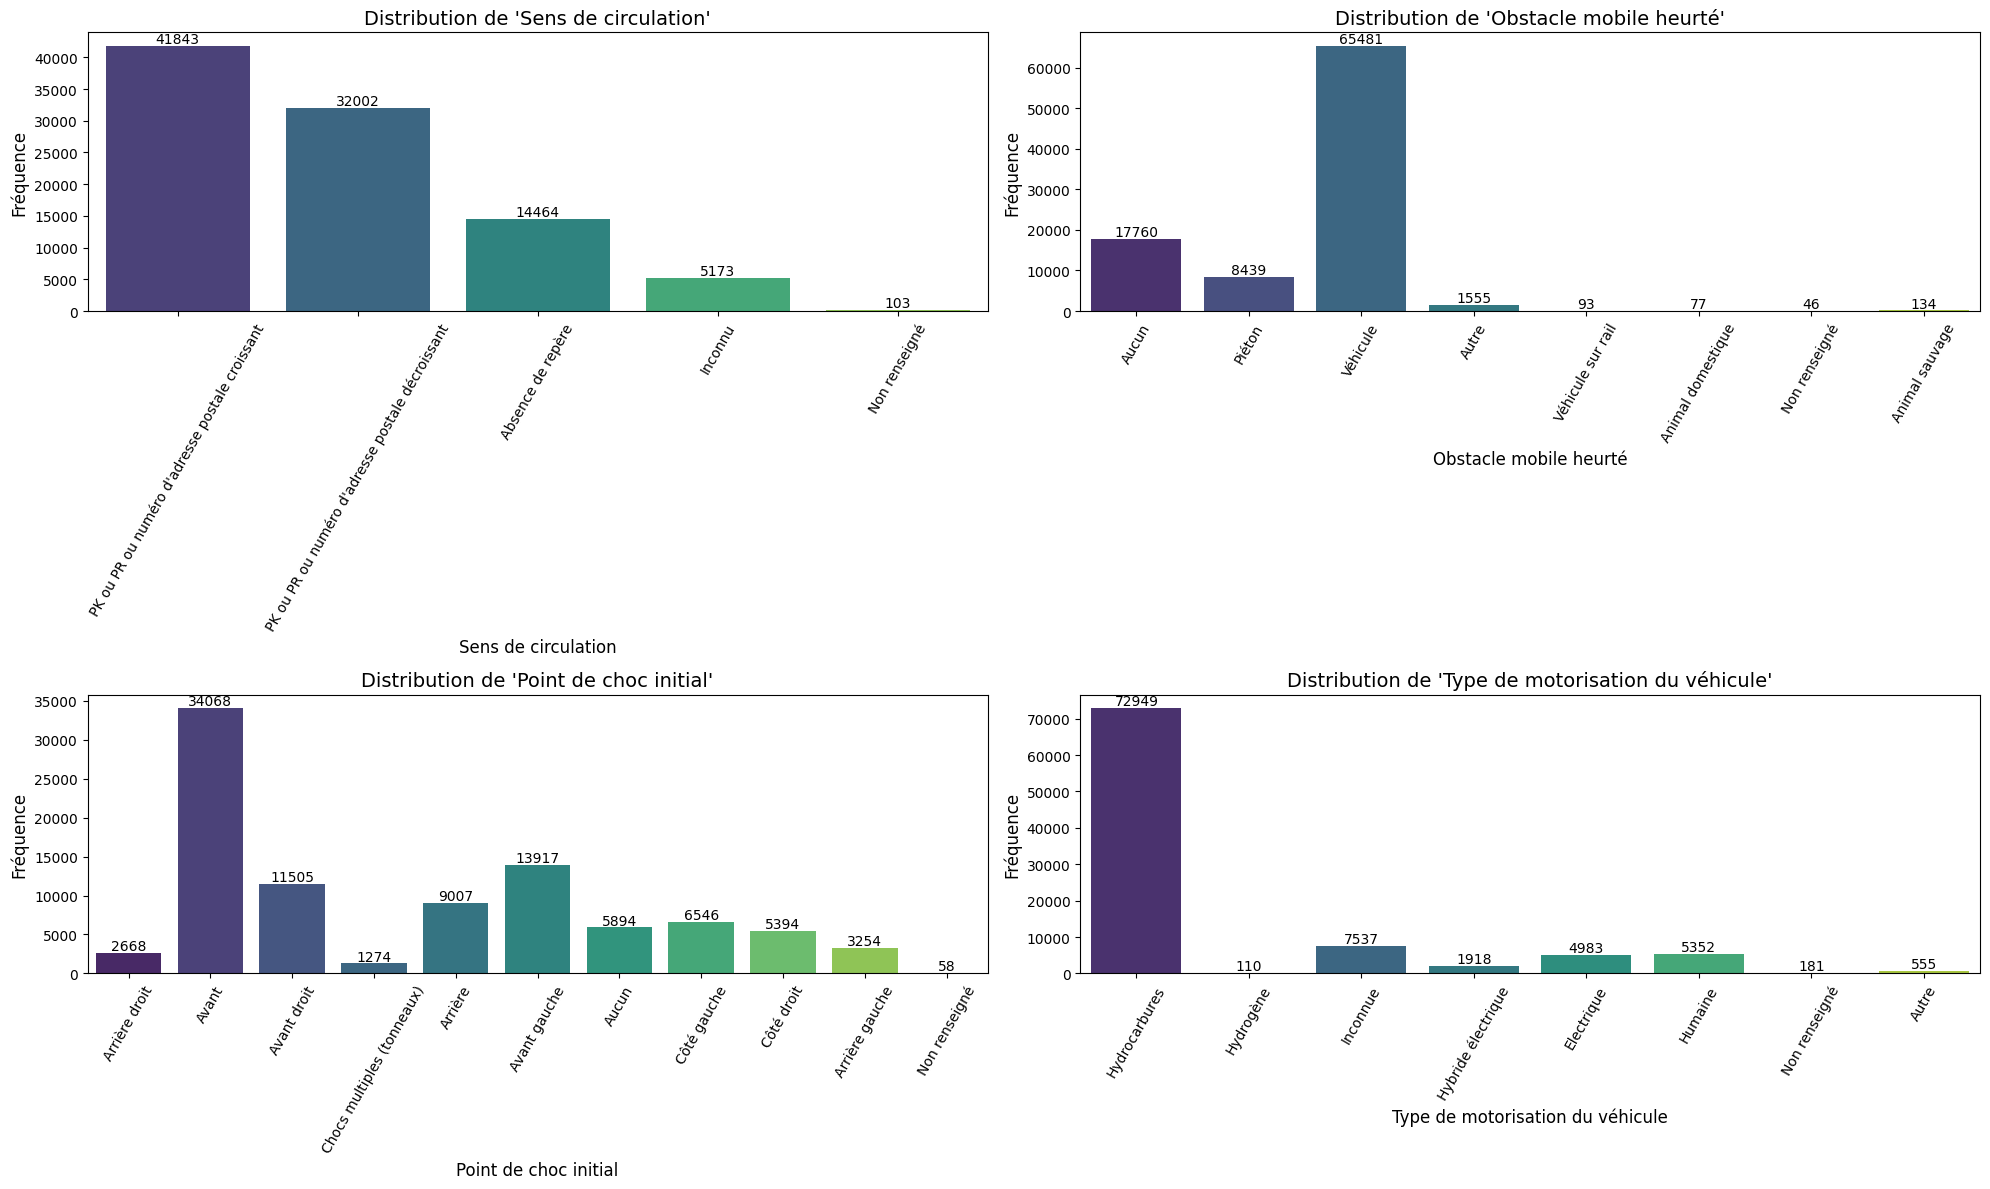

In [63]:
plot_all_distributions1(df_vehicules, columns4)

#### Sens de circulation (senc)
La majorit√© des usagers impliqu√©s dans des accidents circulaient dans des sens identifi√©s, tels que "PK ou PR ou num√©ro d'adresse postale croissant" (41‚ÄØ843 usagers) et "PK ou PR ou num√©ro d'adresse postale d√©croissant" (32‚ÄØ002 usagers), tandis qu'une proportion non n√©gligeable (5‚ÄØ173 usagers) a √©t√© enregistr√©e avec un sens de circulation inconnu, ce qui pourrait refl√©ter des lacunes dans la collecte des donn√©es ou des situations ambigu√´s, telles que des accidents survenus √† des intersections, dans des zones non balis√©es, ou impliquant des usagers pour lesquels la direction √©tait difficile √† d√©terminer.

#### Obstacle mobile heurt√© (obsm)
La majorit√© des accidents sont associ√©s √† des v√©hicules, repr√©sentant 65 481 cas. Les accidents sans obstacle mobile viennent en seconde position avec 17 760 cas, suivis de ceux impliquant des pi√©tons, qui comptent 8 439 cas. Ces chiffres pourraient refl√©ter un non-respect du code de la route ou des comportements imprudents. En revanche, une faible proportion des accidents est li√©e √† des animaux domestiques (77 cas), des animaux sauvages (134 cas) et des v√©hicules sur rail (93 cas).

#### Point de choc initial (choc)
Les accidents se produisent principalement √† l‚Äôavant du v√©hicule (34 068 cas), suivis des collisions √† l‚Äôavant gauche (13 917 cas) et √† l‚Äôavant droit (11 505 cas), tandis que les chocs multiples (tonneaux) sont rares (1 274 cas), sugg√©rant que les impacts frontaux sont les plus fr√©quents, mais que les risques graves, bien que moins fr√©quents, concernent surtout les accidents complexes et les collisions arri√®re droit (2 668 cas).

#### Type de motorisation du v√©hicule (motor)


In [69]:
def other_plot(df, column, title, xlabel, ylabel= "Frequence", rotation=45, palette='viridis'):
    
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(x=df[column], palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()

/tmp/ipykernel_4741/4071869320.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




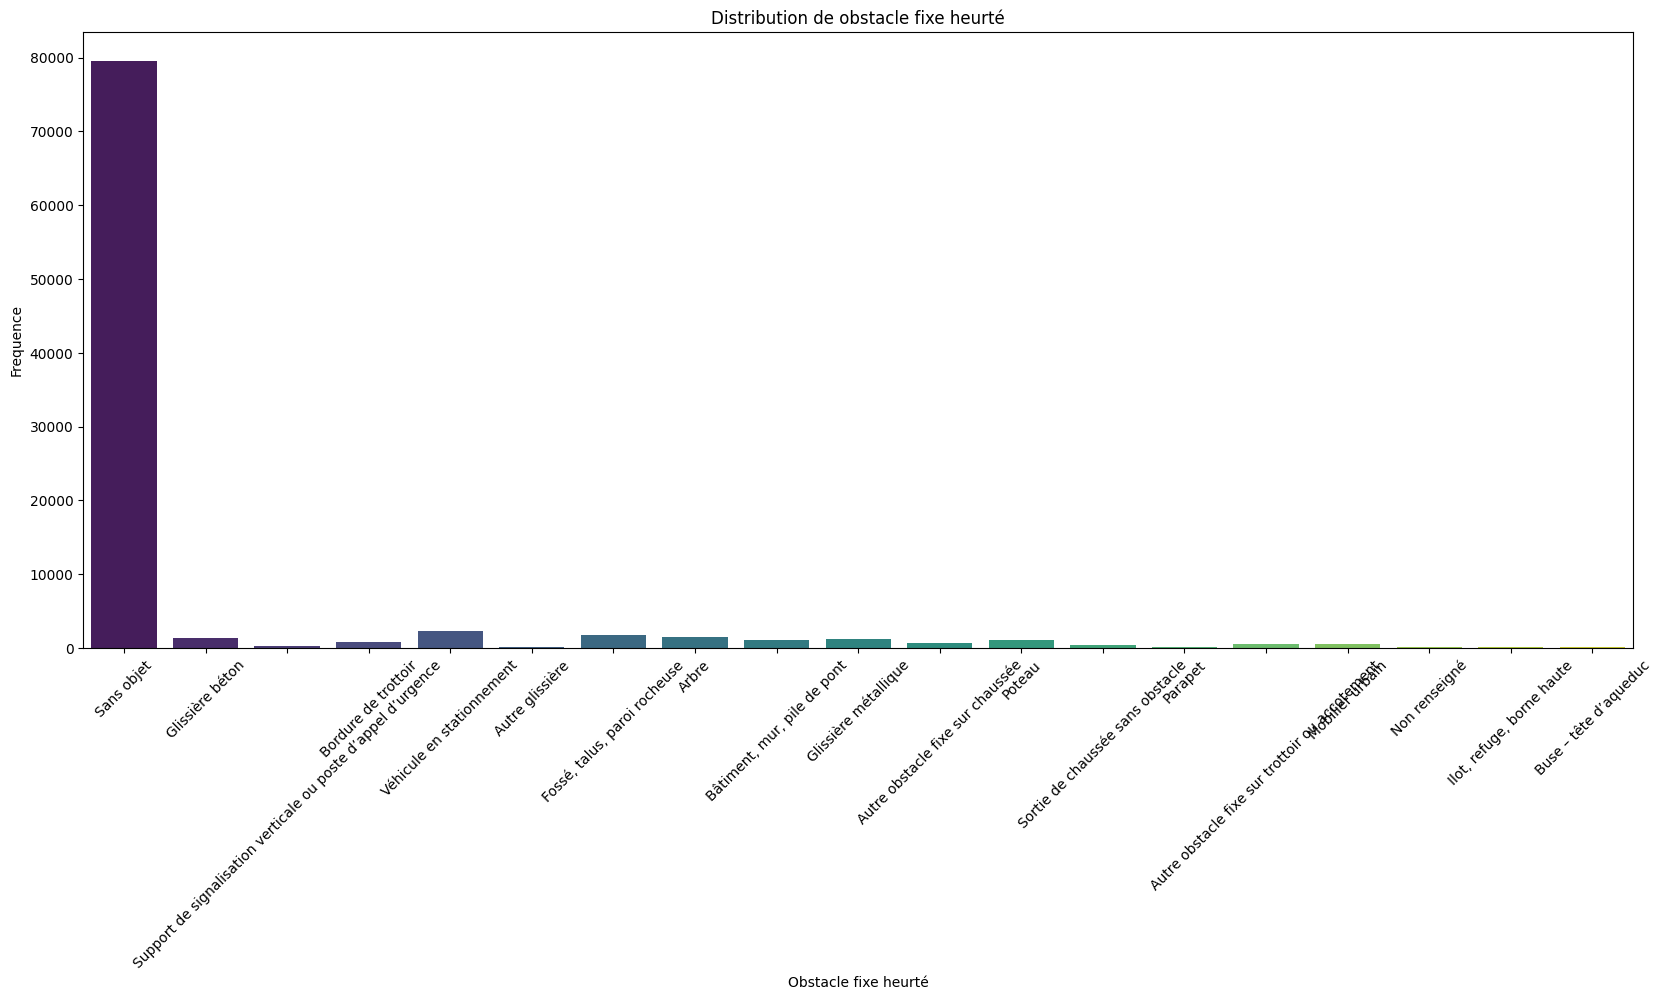

In [70]:
other_plot(df_vehicules, "obs", "Distribution de obstacle fixe heurt√©", "Obstacle fixe heurt√©")

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x=df_vehicules["manv"], palette='viridis')
plt.title("Distribution de obstacle fixe heurt√©")
plt.xlabel("Obstacle fixe heurt√©")
plt.ylabel("Fr√©quence")
plt.xticks(rotation=45)
plt.show()
other_plot(df_vehicules, "manv", "", "Obstacle fixe heurt√©")

/tmp/ipykernel_4741/436839276.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




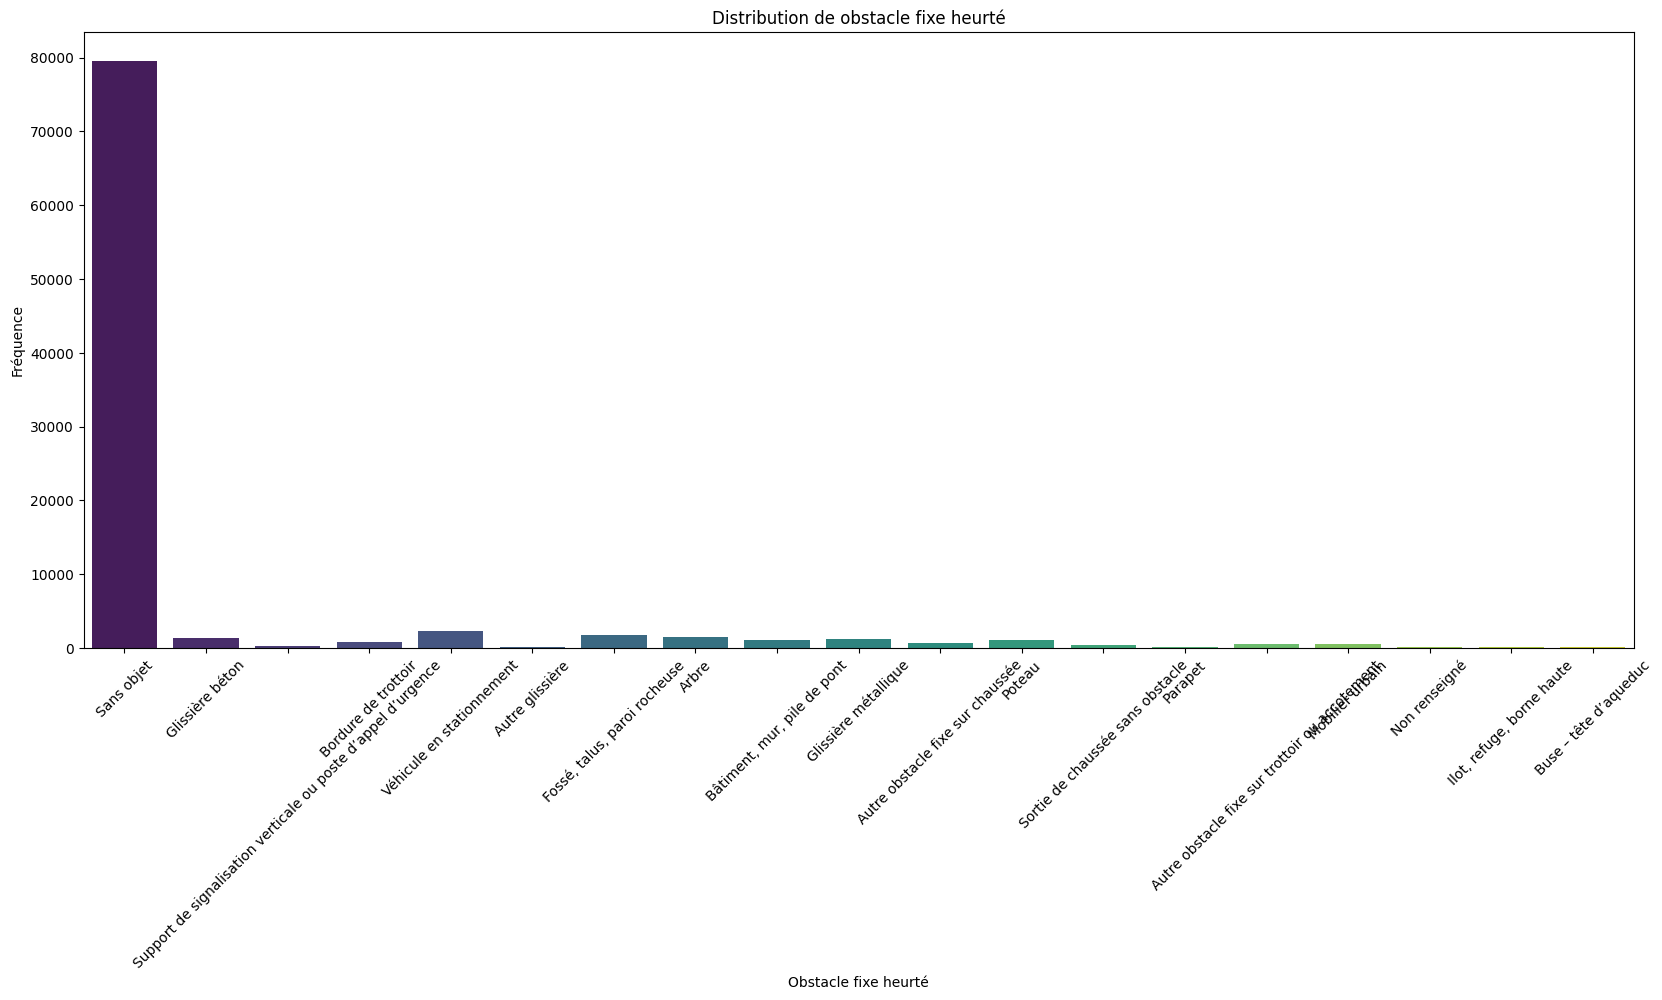

In [64]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x=df_vehicules["obs"], palette='viridis')
plt.title("Distribution de obstacle fixe heurt√©")
plt.xlabel("Obstacle fixe heurt√©")
plt.ylabel("Fr√©quence")
plt.xticks(rotation=45)
plt.show()

#### Obstacle fixe heurt√© (obs)
La distribution montre que la grande majorit√© des accidents enregistr√©s ne sont associ√©s √† aucun obstacle fixe heurt√©, avec 79 495 cas identifi√©s comme "Sans objet". Parmi les autres obstacles les plus fr√©quemment heurt√©s, on trouve les "glissi√®res de b√©ton" (1 397 cas), les "v√©hicules en stationnement" (2 234 cas), et les "foss√©s, talus ou parois rocheuses" (1 717 cas), tandis que les obstacles moins courants incluent des "buses - t√™tes d'aqueduc" (100 cas) et des "√Ælots-refuges, bornes hautes" (57 cas).

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x=df_vehicules["catv"], palette='viridis')
plt.title("Distribution de Categorie de vehicule")
plt.xlabel("Cat√©gorie de v√©hicule")
plt.ylabel("Fr√©quence")
plt.xticks(rotation=45)
plt.show()

### Relation variables-target

In [ ]:
def diagramme_profils(data, target_var, other_var):
    croisement = pd.crosstab(data[target_var], data[other_var], normalize='index') * 100
    
    ax = croisement.plot(kind='bar', stacked=True, colormap="viridis", figsize=(10, 6))
    
    # Ajouter des num√©ros sur les barres
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Pour √©viter d'ajouter un texte si la barre est vide
            ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, f'{height:.1f}%', 
                    ha='center', va='center', color='white', fontweight='bold')
    
    plt.title(f"Diagramme des profils : {target_var} vs {other_var}")
    plt.ylabel("Pourcentage (%)")
    plt.xlabel(target_var)
    plt.legend(title=other_var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
def create_profile_table(data, var1, var2):
    
    contingency_table = pd.crosstab(data[var1], data[var2])
    profile_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    return profile_table

In [ ]:
#Mapping 
catu_labels = {1: 'Conducteur', 2: 'Passager', 3: 'Pi√©ton'}
grav_labels = {1: 'Indemne', 2: 'Tu√©', 3: 'Bless√© hospitalis√© > 24h', 4: 'Bless√© l√©ger',-1: 'Non renseign√©'}
secu1_labels = {
    -1: "Non renseign√©",
    0: "Aucun √©quipement",
    1: "Ceinture",
    2: "Casque",
    3: "Dispositif enfants",
    4: "Gilet r√©fl√©chissant",
    5: "Airbag (2RM/3RM)",
    6: "Gants (2RM/3RM)",
    7: "Gants + Airbag (2RM/3RM)",
    8: "Non d√©terminable",
    9: "Autre"
}
secu2_labels = {
    -1: "Non renseign√©",
    0: "Aucun √©quipement",
    1: "Ceinture",
    2: "Casque",
    3: "Dispositif enfants",
    4: "Gilet r√©fl√©chissant",
    5: "Airbag (2RM/3RM)",
    6: "Gants (2RM/3RM)",
    7: "Gants + Airbag (2RM/3RM)",
    8: "Non d√©terminable",
    9: "Autre"
}                                                                                                                


#### gravit√© (grav) et cat√©gorie de l'usager (catu)

In [ ]:
df_merge['grav'] = df_merge['grav'].replace(grav_labels)    
df_merge['catu'] = df_merge['catu'].replace(catu_labels)  
df_merge['secu1'] = df_merge['secu1'].replace(secu1_labels)
df_merge['secu2'] = df_merge['secu2'].replace(secu1_labels)

variables_to_replace = ['grav', 'catu', 'secu1', 'secu2']
for var in variables_to_replace:
    df_merge[var] = df_merge[var].replace("Non renseign√©", np.nan)

In [ ]:
diagramme_profils(df_merge, "grav", "catu")

L'influence de la cat√©gorie d'utilisateur (catu) sur la gravit√© des blessures (grav) montre que 71,11 % des conducteurs bless√©s sont hospitalis√©s plus de 24 heures, 67,6 % subissent des blessures l√©g√®res et 83,3 % sortent indemnes, bien que 71,8 % des conducteurs d√©c√®dent dans l'accident. Chez les passagers, 16,7 % sont hospitalis√©s plus de 24 heures, 20 % sont l√©g√®rement bless√©s, et 16,2 % sont indemnes, avec 14,2 % de passagers tu√©s. En revanche, les pi√©tons sont beaucoup plus vuln√©rables, avec seulement 0,6 % indemnes, 13,1 % bless√©s hospitalis√© √† plus de 24h et un taux √©lev√© de d√©c√®s, repr√©sentant 14 % des victimes tu√©es, soulignant leur grande fragilit√© face aux accidents.

Gravit√© (grav) et √©quipement de s√©curit√©1 (secu1)

In [ ]:
create_profile_table(df_merge, "grav", "secu1")                   

Les donn√©es semblent indiquer une influence du type d‚Äô√©quipement de s√©curit√© (secu1) sur la gravit√© des blessures (grav). Par exemple, les proportions de bless√©s hospitalis√©s sont particuli√®rement √©lev√©es parmi les utilisateurs de casques (37,69 %) et de ceintures (32,00 %), tout en restant significatives pour ceux sans √©quipement (18,12 %). Concernant les d√©c√®s, une part importante concerne les individus sans √©quipement (25,28 %), mais √©galement les utilisateurs de casques (26,72 %) et de ceintures (32,65 %). √Ä l‚Äôinverse, la majorit√© des personnes indemnes portaient une ceinture (79,17 %) ou utilisaient un dispositif pour enfants (61,67 %), sugg√©rant une meilleure protection offerte par ces √©quipements. Ces r√©sultats mettent en √©vidence une corr√©lation probable entre l‚Äô√©quipement de s√©curit√© utilis√© et la gravit√© des blessures.

Gravit√© (grav) et √©quipement de s√©curit√©2 (secu2)

In [ ]:
create_profile_table(df_merge, "grav", "secu2") 

Les donn√©es montrent que le type d‚Äô√©quipement de s√©curit√© secondaire (secu2) semble √©galement avoir une influence potentielle sur la gravit√© des blessures (grav). Les proportions de bless√©s hospitalis√©s sont particuli√®rement √©lev√©es parmi les utilisateurs de gants (49,53 %) et les personnes sans √©quipement (33,04 %), tandis qu‚Äôelles sont plus faibles pour les utilisateurs de ceintures (0,55 %) et de dispositifs pour enfants (0,26 %). Concernant les d√©c√®s, les proportions sont √©lev√©es chez les utilisateurs de gants (44,41 %) et ceux sans √©quipement (36,80 %), ce qui sugg√®re une vuln√©rabilit√© accrue dans ces groupes. √Ä l‚Äôinverse, les proportions d‚Äôindemnes sont majoritairement observ√©es chez les personnes sans √©quipement (76,53 %), suivies des utilisateurs de ceintures (55,51 %) et de dispositifs pour enfants (28,73 %), ce qui indique une meilleure protection relative pour ces derniers. Ces r√©sultats sugg√®rent une corr√©lation probable entre l‚Äô√©quipement de s√©curit√© secondaire utilis√© et la gravit√© des blessures.

In [ ]:
def afficher_tableau(data, target_var, other_var):
    # Cr√©ation du croisement
    croisement = pd.crosstab(data[target_var], data[other_var], normalize='index') * 100

    # Cr√©ation de la figure pour afficher le tableau
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')  # Masquer les axes
    ax.table(cellText=croisement.round(2).values,  # Valeurs arrondies √† 2 d√©cimales
             colLabels=croisement.columns, 
             rowLabels=croisement.index, 
             loc='center', 
             cellLoc='center', 
             colLoc='center', 
             bbox=[0, 0, 1, 1])  # Positionner le tableau

    plt.title(f"Tableau des profils : {target_var} vs {other_var}")
    plt.tight_layout()
    print(croisement)
    



In [ ]:
afficher_tableau(df_merge, "grav", "secu2")

In [ ]:
obsm_labels = {
    -1: "Non renseign√©",
    0: "Aucun",
    1: "Pi√©ton",
    2: "V√©hicule",
    4: "V√©hicule sur rail",
    5: "Animal domestique",
    6: "Animal sauvage",
    9: "Autre"
}
choc_labels = {
    -1: "Non renseign√©",
    0: "Aucun",
    1: "Avant",
    2: "Avant droit",
    3: "Avant gauche",
    4: "Arri√®re",
    5: "Arri√®re droit",
    6: "Arri√®re gauche",
    7: "C√¥t√© droit",
    8: "C√¥t√© gauche",
    9: "Chocs multiples (tonneaux)"
}
motor_labels = {
    -1: "Non renseign√©",
    0: "Inconnue",
    1: "Hydrocarbures",
    2: "Hybride √©lectrique",
    3: "Electrique",
    4: "Hydrog√®ne",
    5: "Humaine",
    6: "Autre"
}

In [ ]:
df_merge['obsm'] = df_merge['obsm'].replace(obsm_labels)    
df_merge['choc'] = df_merge['choc'].replace(choc_labels)  
df_merge['motor'] = df_merge['motor'].replace(secu1_labels)

variables_to_replace = ['obsm', 'choc', 'motor']
for var in variables_to_replace:
    df_merge[var] = df_merge[var].replace("Non renseign√©", np.nan)

In [ ]:
create_profile_table(df_merge, "grav", "obsm")

In [ ]:
create_profile_table(df_merge, "grav", "choc")

In [ ]:
create_profile_table(df_merge, "grav", "motor") 

In [ ]:
# Recodage
variables_to_replace = ['grav', 'catu', 'secu1', 'secu2','obsm', 'choc', 'motor']
for var in variables_to_replace:
    df_merge[var] = df_merge[var].replace("Non renseign√©", np.nan)

In [ ]:
#Remapping 
catu_labels1 = {'Conducteur': 1, 'Passager': 2, 'Pi√©ton': 3}
grav_labels1 = {'Indemne': 1, 'Tu√©': 2, 'Bless√© hospitalis√© > 24h': 3, 'Bless√© l√©ger': 4, 'Non renseign√©': -1}
secu1_labels1 = {
    "Non renseign√©": -1,
    "Aucun √©quipement": 0,
    "Ceinture": 1,
    "Casque": 2,
    "Dispositif enfants": 3,
    "Gilet r√©fl√©chissant": 4,
    "Airbag (2RM/3RM)": 5,
    "Gants (2RM/3RM)": 6,
    "Gants + Airbag (2RM/3RM)": 7,
    "Non d√©terminable": 8,
    "Autre": 9
}
secu2_labels1 = {
    "Non renseign√©": -1,
    "Aucun √©quipement": 0,
    "Ceinture": 1,
    "Casque": 2,
    "Dispositif enfants": 3,
    "Gilet r√©fl√©chissant": 4,
    "Airbag (2RM/3RM)": 5,
    "Gants (2RM/3RM)": 6,
    "Gants + Airbag (2RM/3RM)": 7,
    "Non d√©terminable": 8,
    "Autre": 9
}

obsm_labels1 = {
    "Non renseign√©": -1,
    "Aucun": 0,
    "Pi√©ton": 1,
    "V√©hicule": 2,
    "V√©hicule sur rail": 4,
    "Animal domestique": 5,
    "Animal sauvage": 6,
    "Autre": 9
}
choc_labels1 = {
    "Non renseign√©": -1,
    "Aucun": 0,
    "Avant": 1,
    "Avant droit": 2,
    "Avant gauche": 3,
    "Arri√®re": 4,
    "Arri√®re droit": 5,
    "Arri√®re gauche": 6,
    "C√¥t√© droit": 7,
    "C√¥t√© gauche": 8,
    "Chocs multiples (tonneaux)": 9
}
motor_labels1 = {
    "Non renseign√©": -1,
    "Inconnue": 0,
    "Hydrocarbures": 1,
    "Hybride √©lectrique": 2,
    "Electrique": 3,
    "Hydrog√®ne": 4,
    "Humaine": 5,
    "Autre": 6
}


In [ ]:
df_merge['grav'] = df_merge['grav'].replace(grav_labels1)    
df_merge['catu'] = df_merge['catu'].replace(catu_labels1)  
df_merge['secu1'] = df_merge['secu1'].replace(secu1_labels1)
df_merge['secu2'] = df_merge['secu2'].replace(secu1_labels1)
df_merge['obsm'] = df_merge['obsm'].replace(obsm_labels1)    
df_merge['choc'] = df_merge['choc'].replace(choc_labels1)  
df_merge['motor'] = df_merge['motor'].replace(secu1_labels1)

Matrice des V de Cramer

In [ ]:
# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))
    
#Fonction pour la matrice de V de Cramer
def matrice_v_cramer(data,colonnes):
    #Cr√©er un DataFrame vide pour la matrice V de Cramer
    cramers_v_matrix = pd.DataFrame(index=colonnes, columns=colonnes)

    # Calculer les V de Cramer pour chaque paire de colonnes
    for col1 in colonnes:
        for col2 in colonnes:
            cramers_v_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

    # Convertir la matrice en valeurs num√©riques
    cramers_v_matrix = cramers_v_matrix.astype(float)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', cbar=True)
    plt.title("Matrice des V de Cramer")
    plt.show()

In [ ]:
colonnes_a_inclure1 = ["grav","sexe", "catu", "trajet", "secu1", "secu2", "locp", "actp","etatp"]
matrice_v_cramer(df_merge,colonnes_a_inclure1)

Les relations les plus significatives concernent catu avec locp, actp, et etatp (avec des V de Cramer de 0,69;0,69 et 0,68 respectivement), ce qui refl√®te la nature interd√©pendante de ces variables descriptives .Les √©quipements de s√©curit√© (secu1 et secu2) semblent avoir une influence mod√©r√©e sur la gravit√© de l'accident (avec des V de Cramer de 0,26 et 0,17 respectivement) et sont li√©s entre eux (avec un V de Cramer de0,36).Le sexe influence principalement les choix d‚Äô√©quipement secu1 (avec un V de Cramer de 0,62) mais semble jouer un r√¥le moindre dans les autres relations.

In [ ]:
colonnes_a_inclure2 = ["grav","senc", "catv", "obs", "obsm", "choc", "manv", "motor"]
matrice_v_cramer(df_merge,colonnes_a_inclure2) 

Cette matrice des V de Cramer repr√©sente la force des associations entre les variables cat√©goriques nominales de ma base. La matrice des V de Cramer montre que la majorit√© des relations entre les variables sont faiblement associ√©es (ùëâ<0.1), indiquant peu de d√©pendance entre elles et sugg√©rant que chaque variable apporte des informations distinctes. Une exception notable est l‚Äôassociation mod√©r√©e entre motor et catv (V=0.49), ce qui sugg√®re que le type de motorisation d‚Äôun v√©hicule est fortement li√© √† sa cat√©gorie. Une autre relation mod√©r√©e est observ√©e entre obs et obsm (V=0.29), probablement parce que ces deux variables sont li√©es √† des aspects similaires de l‚Äôobservation ou de la man≈ìuvre. Ces r√©sultats confirment la pertinence des variables pour une analyse plus approfondie, tout en indiquant que seules quelques-unes sont fortement li√©es.

In [ ]:
# ajout du libell√© des d√©partements

df_code_dep=df_dep[["DEP","LIBELLE"]]
#df_code_com=df_com[["COM","LIBELLE"]]
df_merge=pd.merge(left=df_merge, right=df_code_dep,left_on="dep", right_on="DEP", how="left")
#database=pd.merge(left=df_merge, right=df_code_com,left_on="com", right_on="COM", how="left")
database=df_merge.drop(["DEP"], axis=1)
database.info()

In [ ]:
print(f"la base usagers a {df_usagers.shape[0]} observations et {df_usagers.shape[1]} variables.")

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
grav_dict={-1:"Non renseign√©",1:'Indemne',2:"Tu√©",3:'Bl√©ss√© hospitalis√©',4:'Bless√© leger'}
grav_nv=df_usagers['grav'].replace(grav_dict)
grav_prct=(grav_nv.value_counts()/df_usagers.shape[0])*100
grav_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Gravit√© de l'accident")
plt.ylabel("percentage(%)")

plt.subplot(1,2,2)
catu_dict={1:"Conducteur",2:"Passager",3:"Pi√©ton"}
catu_nv=df_usagers['catu'].replace(catu_dict)
catu_prct=(catu_nv.value_counts()/df_usagers.shape[0])*100
catu_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Cat√©gorie d'usager")
plt.ylabel("percentage(%)")


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sexe_dict={1:"Homme",2:"Femme"}
sexe_nv=df_usagers['sexe'].replace(sexe_dict)
sexe_prct=(sexe_nv.value_counts()/df_usagers.shape[0])*100
sexe_prct.plot(kind="bar")
plt.xticks(rotation=45)
plt.xlabel("Sexe")
plt.ylabel("percentage(%)")


plt.subplot(1,2,2)
#grav_dict={-1:"Non renseign√©",1:'Indemne',2:"Tu√©",3:'Bl√©ss√© hospitalis√©',4:'Bless√© leger'}
#grav_nv=df_usagers['grav'].replace(grav_dict)
grav_prct=(df_usagers['trajet'].value_counts()/df_usagers.shape[0])*100
grav_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Gravit√© de l'accident")
plt.ylabel("percentage(%)")


In [ ]:
#cration carte
import geopandas as gpd

### 3)- Description de la base lieux

In [ ]:
df_lieux.head()

In [ ]:
catr_labels = {
    1: "Autoroute",
    2: "Route nationale",
    3: "Route d√©partementale",
    4: "Voie communale",
    5: "Hors r√©seau public",
    6: "Parc de stationnement",
    7: "Routes de m√©tropole urbaine",
    9: "Autre"
}

circ_labels = {
    -1: "Non renseign√©",
    1: "√Ä sens unique",
    2: "Bidirectionnelle",
    3: "√Ä chauss√©es s√©par√©es",
    4: "Avec voies d‚Äôaffectation variable"
}

vosp_labels = {
    -1: "Non renseign√©",
    0: "Sans objet",
    1: "Piste cyclable",
    2: "Bande cyclable",
    3: "Voie r√©serv√©e"
}

prof_labels = {
    -1: "Non renseign√©",
    1: "Plat",
    2: "Pente",
    3: "Sommet de c√¥te",
    4: "Bas de c√¥te"
}

plan_labels = {
    -1: "Non renseign√©",
    1: "Partie rectiligne",
    2: "En courbe √† gauche",
    3: "En courbe √† droite",
    4: "En 'S'"
}

surf_labels = {
    -1: "Non renseign√©",
    1: "Normale",
    2: "Mouill√©e",
    3: "Flaques",
    4: "Inond√©e",
    5: "Enneig√©e",
    6: "Boue",
    7: "Verglac√©e",
    8: "Corps gras ‚Äì huile",
    9: "Autre"
}

infra_labels = {
    -1: "Non renseign√©",
    0: "Aucun",
    1: "Souterrain - tunnel",
    2: "Pont - autopont",
    3: "Bretelle d‚Äô√©changeur",
    4: "Voie ferr√©e",
    5: "Carrefour am√©nag√©",
    6: "Zone pi√©tonne",
    7: "Zone de p√©age",
    8: "Chantier",
    9: "Autres"
}

situ_labels = {
    -1: "Non renseign√©",
    0: "Aucun",
    1: "Sur chauss√©e",
    2: "Sur bande d‚Äôarr√™t d‚Äôurgence",
    3: "Sur accotement",
    4: "Sur trottoir",
    5: "Sur piste cyclable",
    6: "Sur autre voie sp√©ciale",
    8: "Autres"
}


In [ ]:
# Comptage des occurrences par cat√©gorie de route
catr_counts = df_lieux['catr'].value_counts().sort_index()

# Remplacement des codes par les labels pour l'affichage
catr_counts.index = catr_counts.index.map(catr_labels)

# Cr√©ation du diagramme
plt.figure(figsize=(10, 6))
catr_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Nombre d'accidents par type de route (catr)")
plt.xlabel("Type de route")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

### 3)- Description de la base Caract

In [ ]:
df_caract.head()

In [ ]:
lum_labels = {
    1: "Plein jour",
    2: "Cr√©puscule ou aube",
    3: "Nuit sans √©clairage public",
    4: "Nuit avec √©clairage public non allum√©",
    5: "Nuit avec √©clairage public allum√©"
}

agg_labels = {
    1: "Hors agglom√©ration",
    2: "En agglom√©ration"
}

int_labels = {
    1: "Hors intersection",
    2: "Intersection en X",
    3: "Intersection en T",
    4: "Intersection en Y",
    5: "Intersection √† plus de 4 branches",
    6: "Giratoire",
    7: "Place",
    8: "Passage √† niveau",
    9: "Autre intersection"
}

atm_labels = {
    -1: "Non renseign√©",
    1: "Normale",
    2: "Pluie l√©g√®re",
    3: "Pluie forte",
    4: "Neige - gr√™le",
    5: "Brouillard - fum√©e",
    6: "Vent fort - temp√™te",
    7: "Temps √©blouissant",
    8: "Temps couvert",
    9: "Autre"
}

col_labels = {
    -1: "Non renseign√©",
    1: "Deux v√©hicules - frontale",
    2: "Deux v√©hicules ‚Äì par l‚Äôarri√®re",
    3: "Deux v√©hicules ‚Äì par le c√¥t√©",
    4: "Trois v√©hicules et plus ‚Äì en cha√Æne",
    5: "Trois v√©hicules et plus - collisions multiples",
    6: "Autre collision",
    7: "Sans collision"
}


In [ ]:
# Calcul des pourcentages d'accidents par mois
mois_counts = df_caract['mois'].value_counts(normalize=True).sort_index() * 100

# Cr√©ation du diagramme avec pourcentages
plt.figure(figsize=(10, 6))
mois_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Pourcentage d'accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(ticks=range(len(mois_counts)), labels=[
    "Janvier", "F√©vrier", "Mars", "Avril", "Mai", "Juin", 
    "Juillet", "Ao√ªt", "Septembre", "Octobre", "Novembre", "D√©cembre"
], rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.tight_layout()

# Affichage du graphique
plt.show()

In [ ]:
# Filtrer les donn√©es pour le mois d'octobre (mois = 10)
octobre_data = df_caract[df_caract['mois'] == 10]

# Croiser les accidents d'octobre avec les conditions atmosph√©riques (atm)
atm_counts = octobre_data['atm'].value_counts().sort_index()

# Remplacer les codes par leurs labels pour l'affichage
atm_counts.index = atm_counts.index.map(atm_labels)

# Cr√©ation du diagramme
plt.figure(figsize=(10, 6))
atm_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Nombre d'accidents en octobre par conditions atmosph√©riques (atm)")
plt.xlabel("Conditions atmosph√©riques")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

In [ ]:
accidents_par_departement = df_caract.groupby('dep').size().reset_index(name='nombre_accidents')
accidents_par_departement.head()

In [ ]:
france_map = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
france_map = france_map.merge(accidents_par_departement, left_on="code", right_on="dep")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
france_map.plot(column="nombre_accidents", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

plt.title("Nombre d'accidents de la route par d√©partement")
plt.axis("off")
plt.show()#i

In [ ]:
dep_IDF = ["75", "77", "78", "91", "92", "93", "94", "95"]
accidents_idf = df_caract[df_caract['dep'].isin(dep_IDF)]

# Remplacer les virgules par des points et convertir en float
accidents_idf['lat'] = accidents_idf['lat'].str.replace(',', '.').astype(float)
accidents_idf['long'] = accidents_idf['long'].str.replace(',', '.').astype(float)

accidents_idf.head()

In [ ]:
import folium
from folium.plugins import HeatMap

accidents_coords = accidents_idf[['lat', 'long']].dropna()

# Initialiser la carte centr√©e sur l'√éle-de-France
map_idf = folium.Map(location=[48.8566, 2.3522], zoom_start=10)

# Ajouter la carte de densit√©
HeatMap(
    data=accidents_coords.values,
    radius=10,               
    blur=15,                 
    max_zoom=10,             
    min_opacity=0.2,         
    gradient={               
        0.2: 'blue',
        0.4: 'lime',
        0.6: 'yellow',
        0.8: 'orange',
        1.0: 'red'
    }
).add_to(map_idf)

# Afficher la carte
map_idf

## **II- Relation variables-target**

## **III- Mod√©lisation**

In [ ]:
## recoder la variable catv car elle a beaucoup de cat√©gories

### 1- Construction de la base de donn√©es pour la mod√©lisation

Nous allons nous servir de la base de donn√©es fusionn√©e au d√©but du projet.

Nous commen√ßons par supprimer les variables qui ne sont pas pertinentes pour la mod√©lisation. Il s'agit principalement des variables d'identification.

In [ ]:
var=["Num_Acc","jour","an","com","adr","lat","long","voie","v1","v2","id_vehicule","num_veh","id_usager", "dep"]
Num_acc=df_merge["Num_Acc"]
df_merge.drop(var, axis=1,inplace=True)

Nous allons par la suite visualiser le pourcentage de valeurs manquantes de la base:

In [ ]:
df_merge.isna().sum()[df_merge.isna().sum()!=0]/len(df_merge)*100

Nous supprimons les variables qui ont plus de 90% de valeurs manquantes car elles n'apportent pas vraiment d'informations.

In [ ]:
df_merge.drop(["occutc","lartpc"], axis=1, inplace=True)

Ensuite, nous d√©duisons de la variable "an_nais" (ann√©e de naissance), l'√¢ge des individus, et nous rempla√ßons les valeurs manquantes par la m√©diane car elle est moins sensible aux valeurs abb√©rantes.

In [ ]:
df_merge["Age"] = 2023-df_merge["an_nais"]
df_merge["Age"]=df_merge["Age"].fillna(df_merge["Age"].median())

Nous allons nous servir de la base de donn√©es fusionn√©e au d√©but du projet.

Nous commen√ßons par supprimer les variables qui ne sont pas pertinentes pour la mod√©lisation. Il s'agit principalement des variables d'identification.

In [ ]:
var=["Num_Acc","jour","an","com","adr","lat","long","voie","v1","v2","id_vehicule","num_veh","id_usager", "dep"]
Num_acc=df_merge["Num_Acc"]
df_merge.drop(var, axis=1,inplace=True)

De l'analyse descriptive, les variables qui semblent avoir plus d'influence sur la gravit√© de l'accident sont: ...

On restreint la base de donn√©es √† ces variables.

## **Conclusion**